In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 24

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

Shape = (10999, 30)
Testing MSE  59.146833836449744
Testing RMSE  7.690697877075249
Testing MAE  5.437156782058965
Shape = (10998, 30)
Testing MSE  87.06026928157543
Testing RMSE  9.330609266364949
Testing MAE  7.2531205667012815
Shape = (10997, 30)
Testing MSE  109.42834750138913
Testing RMSE  10.460800519147142
Testing MAE  8.544567927866337
Shape = (10996, 30)
Testing MSE  125.93970329791141
Testing RMSE  11.222286010341717
Testing MAE  9.318900734630386
Shape = (10995, 30)
Testing MSE  138.23661536370355
Testing RMSE  11.757406829896784
Testing MAE  9.76394758107959
Shape = (10994, 30)
Testing MSE  144.6826514844199
Testing RMSE  12.02841018108461
Testing MAE  9.932452539531079
Shape = (10993, 30)
Testing MSE  149.05414015835245
Testing RMSE  12.208773081614403
Testing MAE  10.021299945764529
Shape = (10992, 30)
Testing MSE  153.32295158723988
Testing RMSE  12.38236453942622
Testing MAE  10.08986076991513
Shape = (10991, 30)
Testing MSE  158.6134211927996
Testing RMSE  12.594182037

In [ ]:
RhourpreRMSE = []
RhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
    
    from sklearn.linear_model import Ridge
    clf = Ridge(alpha=32206)
    clf.fit(X_train,y_train) 
    predf = clf.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    RhourpreRMSE.append(RMSE)
    RhourpreMAE.append(MAE)

print(RhourpreRMSE)
print(RhourpreMAE)

Shape = (10999, 30)
Testing MSE  59.237340956574855
Testing RMSE  7.696579822010219
Testing MAE  5.4782727525009145
Shape = (10998, 30)
Testing MSE  87.30869998968652
Testing RMSE  9.343912456229805
Testing MAE  7.204773046890396
Shape = (10997, 30)
Testing MSE  106.85021421769794
Testing RMSE  10.336837728130298
Testing MAE  8.392099369500519
Shape = (10996, 30)
Testing MSE  117.30032808861309
Testing RMSE  10.830527599734609
Testing MAE  9.050507327628143
Shape = (10995, 30)
Testing MSE  122.32949215253608
Testing RMSE  11.06026636896852
Testing MAE  9.407069444409107
Shape = (10994, 30)
Testing MSE  124.20725436533156
Testing RMSE  11.14483083610207
Testing MAE  9.53327802625185
Shape = (10993, 30)
Testing MSE  125.54855754309425
Testing RMSE  11.204845270823434
Testing MAE  9.608209864600822
Shape = (10992, 30)
Testing MSE  127.25644348986378
Testing RMSE  11.280799771730008
Testing MAE  9.69584876789814
Shape = (10991, 30)
Testing MSE  129.1834033644648
Testing RMSE  11.3658877068

In [ ]:
LhourpreRMSE = []
LhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    from sklearn import linear_model
    clf = linear_model.Lasso(alpha=1.9)
    clf.fit(X_train,y_train)
    predf = clf.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    LhourpreRMSE.append(RMSE)
    LhourpreMAE.append(MAE)

print(LhourpreRMSE)
print(LhourpreMAE)

Shape = (10999, 30)
Testing MSE  59.317036383823286
Testing RMSE  7.701755409244265
Testing MAE  5.3824317111356255
Shape = (10998, 30)
Testing MSE  86.85624454001973
Testing RMSE  9.319669765609708
Testing MAE  7.104431379777022
Shape = (10997, 30)
Testing MSE  105.65526781388796
Testing RMSE  10.278874832095582
Testing MAE  8.290459519671531
Shape = (10996, 30)
Testing MSE  115.41178898327233
Testing RMSE  10.742987898311732
Testing MAE  8.957190842084028
Shape = (10995, 30)
Testing MSE  119.84115937956709
Testing RMSE  10.947198700104384
Testing MAE  9.32835953746073
Shape = (10994, 30)
Testing MSE  121.59828602849697
Testing RMSE  11.027161286047146
Testing MAE  9.473740566559709
Shape = (10993, 30)
Testing MSE  122.8809971050106
Testing RMSE  11.085170143259443
Testing MAE  9.560046357507733
Shape = (10992, 30)
Testing MSE  124.61762508701855
Testing RMSE  11.163226464020989
Testing MAE  9.661188529952538
Shape = (10991, 30)
Testing MSE  126.39039303450404
Testing RMSE  11.2423481

In [ ]:
ENhourpreRMSE = []
ENhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    from sklearn.linear_model import ElasticNet 
    regr = ElasticNet(alpha=1.9, l1_ratio=0.5)
    regr.fit(X_train,y_train)
    predf = regr.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))


    ENhourpreRMSE.append(RMSE)
    ENhourpreMAE.append(MAE)

print(ENhourpreRMSE)
print(ENhourpreMAE)

Shape = (10999, 30)
Testing MSE  59.37313039679313
Testing RMSE  7.705396186880538
Testing MAE  5.398165651617799
Shape = (10998, 30)
Testing MSE  87.02435571957814
Testing RMSE  9.328684565338145
Testing MAE  7.13261329509017
Shape = (10997, 30)
Testing MSE  105.91594954714589
Testing RMSE  10.291547480682674
Testing MAE  8.317575183355624
Shape = (10996, 30)
Testing MSE  116.00207467689091
Testing RMSE  10.77042592829508
Testing MAE  8.9917025949579
Shape = (10995, 30)
Testing MSE  121.00974050466384
Testing RMSE  11.000442741301999
Testing MAE  9.36708525312634
Shape = (10994, 30)
Testing MSE  123.11121140754801
Testing RMSE  11.095549171066208
Testing MAE  9.508107580721413
Shape = (10993, 30)
Testing MSE  124.59564442312129
Testing RMSE  11.162241908466296
Testing MAE  9.588284273496622
Shape = (10992, 30)
Testing MSE  126.50626508284846
Testing RMSE  11.247500392658294
Testing MAE  9.684657548461702
Shape = (10991, 30)
Testing MSE  128.5595547712616
Testing RMSE  11.3384105928150

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


GBMhourpreRMSE = []
GBMhourpreMAE = []
for a in range(Hour_ahead):

    hour_ahead = a+1
    n_estimators = 98
    learning_rate = 0.01
    Depth = 10
    Min_leaf = 256

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))



    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)



    class DecisionTree():
        def __init__(self, x, y, n_features, f_idxs, idxs=None, depth=3, min_leaf=5):
            if idxs is None: idxs=np.arange(len(y))
            self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
            self.depth = depth
            #print(f_idxs)
            #         print(self.depth)
            self.n_features = n_features
            self.n, self.c = len(idxs), x.shape[1]
            self.val = np.mean(y[idxs])
            self.score = float('inf')
            self.find_varsplit()

        def find_varsplit(self):
            for i in self.f_idxs: self.find_better_split(i)
            if self.is_leaf: return
            x = self.split_col
            lhs = np.nonzero(x <= self.split)[0]
            rhs = np.nonzero(x > self.split)[0]
            lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)

        def find_better_split(self, var_idx):
            x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
            sort_idx = np.argsort(x)
            sort_y, sort_x = y[sort_idx], x[sort_idx]
            rhs_sum2: object
            rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y ** 2).sum()
            lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

            for i in range(0, self.n - self.min_leaf - 1):
                xi, yi = sort_x[i], sort_y[i]
                lhs_cnt += 1
                rhs_cnt -= 1
                lhs_sum += yi
                rhs_sum -= yi
                lhs_sum2 += yi ** 2
                rhs_sum2 -= yi ** 2
                if i < self.min_leaf or xi == sort_x[i + 1]:
                    continue

                lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
                rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
                curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
                if curr_score < self.score:
                    self.var_idx, self.score, self.split = var_idx, curr_score, xi

        @property
        def split_name(self):
            return self.x.columns[self.var_idx]

        @property
        def split_col(self):
            return self.x[self.idxs, self.var_idx]

        @property
        def is_leaf(self):
            return self.score == float('inf') or self.depth <= 0

        def predict(self, x):
            return np.array([self.predict_row(xi) for xi in x])

        def predict_row(self, xi):
            if self.is_leaf: return self.val
            t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
            return t.predict_row(xi)

    def std_agg(cnt, s1, s2):
        try:
            return math.sqrt((s2 / cnt) - (s1 / cnt) ** 2)
        except:
            return 0

    xi = X_train
    train_index = X_train.shape
    yi = y_train - np.mean(y_train)
    ei = 0  # initialization of error
    predf = np.mean(y_train)  # initial prediction 0


    def create_tree(x, y, n_features, sample_sz, depth=3, min_leaf=5):
        idxs = np.random.permutation(len(y))[:sample_sz]
        f_idxs = np.random.permutation(x.shape[1])[:n_features]
        return DecisionTree(x[idxs], y[idxs], n_features, f_idxs,
                            idxs=np.array(range(sample_sz)), depth=depth, min_leaf=min_leaf)


    print("hour_ahead = " + str(hour_ahead))
    print("n_estimators = " + str(n_estimators))
    print("learning_rate = " + str(learning_rate))
    print("Depth = " + str(Depth))
    print("Min_leaf = " + str(Min_leaf))


    trees = []
    for i in range(n_estimators):
        tree = create_tree(xi, yi, train_index[1], train_index[0], depth=Depth, min_leaf=Min_leaf)
        predi = tree.predict(xi)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_train, predf)))
        ei = y_train - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop
        trees.append(tree)


    MSE = mean_squared_error(y_train, predf, squared=True)
    print("Training MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Training RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_train, predf)
    print("Training MAE  " + str(MAE))



    xi = X_test
    train_index = X_test.shape
    yi = y_test - np.mean(y_test)
    ei = 0  # initialization of error
    predf = np.mean(y_test)

    i = 0
    for t in trees:
        predi = t.predict(X_test)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_test, predf)))
        ei = y_test - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop

        #if i == 6:
        #   break
        i += 1


    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    GBMhourpreRMSE.append(RMSE)
    GBMhourpreMAE.append(MAE)

print(GBMhourpreRMSE)
print(GBMhourpreMAE)



Shape = (10999, 30)
hour_ahead = 1
n_estimators = 98
learning_rate = 0.01
Depth = 10
Min_leaf = 256
0  7.541505706309231
1  7.478076270290769
2  7.4154363333805335
3  7.353497662885525
4  7.292033210413455
5  7.231392367274846
6  7.171222326695697
7  7.1119134733568075
8  7.053278729977465
9  6.995354622144801
10  6.938077030308728
11  6.88149051201771
12  6.825584636966865
13  6.770577925239653
14  6.7160852373934885
15  6.662193853721872
16  6.6089643116058285
17  6.556348796736022
18  6.504403897615043
19  6.453047112194961
20  6.40244452517767
21  6.35242609730607
22  6.303223862195181
23  6.254540500475446
24  6.20639924936058
25  6.158812937749103
26  6.111879176400035
27  6.0654718018356055
28  6.019752458690498
29  5.974517689723678
30  5.929948950546707
31  5.885971672104937
32  5.842472109633784
33  5.799521309034244
34  5.757164830584031
35  5.7152784635083
36  5.673914486207341
37  5.633120330005847
38  5.5926906047716995
39  5.552703999794389
40  5.5131914480448545
41  5.4

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RFhourpreRMSE = []
RFhourpreMAE = []
for a in range(Hour_ahead):

    hour_ahead = a+1
    N_tree = 50
    Depth = 10
    Min_leaf = 150

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)

    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    #Y.reset_index(drop=True, inplace=True)
    #Y.columns = [''] * len(Y.columns)


    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    #X.reset_index(drop=True, inplace=True)
    #X.columns = [''] * len(X.columns)
    Pred_index = X.shape

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

    class RandomForest():
        def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=10):
            np.random.seed(12)
            if n_features == 'sqrt':
                self.n_features = int(np.sqrt(x.shape[1]))
            elif n_features == 'log2':
                self.n_features = int(np.log2(x.shape[1]))
            else:
                self.n_features = n_features
            #print(self.n_features, "sha: ", x.shape[1])
            self.x, self.y, self.sample_sz, self.depth, self.min_leaf = x, y, sample_sz, depth, min_leaf
            self.trees = [self.create_tree() for i in range(n_trees)]

        def create_tree(self):
            idxs = np.random.permutation(len(self.y))[:self.sample_sz]
            f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            return DecisionTree(self.x[idxs], self.y[idxs], self.n_features, f_idxs,
                                idxs=np.array(range(self.sample_sz)), depth=self.depth, min_leaf=self.min_leaf)

        def predict(self, x):
            return np.mean([t.predict(x) for t in self.trees], axis=0)


    def std_agg(cnt, s1, s2):
        try:
            return math.sqrt((s2 / cnt) - (s1 / cnt) ** 2)
        except:
            return 0


    class DecisionTree():
        def __init__(self, x, y, n_features, f_idxs, idxs, depth, min_leaf):
            self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
            self.depth = depth
            #print(f_idxs)
            #         print(self.depth)
            self.n_features = n_features
            self.n, self.c = len(idxs), x.shape[1]
            self.val = np.mean(y[idxs])
            self.score = float('inf')
            self.find_varsplit()

        def find_varsplit(self):
            for i in self.f_idxs: self.find_better_split(i)
            if self.is_leaf: return
            x = self.split_col
            lhs = np.nonzero(x <= self.split)[0]
            rhs = np.nonzero(x > self.split)[0]
            lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)

        def find_better_split(self, var_idx):
            x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
            sort_idx = np.argsort(x)
            sort_y, sort_x = y[sort_idx], x[sort_idx]
            rhs_sum2: object
            rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y ** 2).sum()
            lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

            for i in range(0, self.n - self.min_leaf - 1):
                xi, yi = sort_x[i], sort_y[i]
                lhs_cnt += 1
                rhs_cnt -= 1
                lhs_sum += yi
                rhs_sum -= yi
                lhs_sum2 += yi ** 2
                rhs_sum2 -= yi ** 2
                if i < self.min_leaf or xi == sort_x[i + 1]:
                    continue

                lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
                rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
                curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
                if curr_score < self.score:
                    self.var_idx, self.score, self.split = var_idx, curr_score, xi

        @property
        def split_name(self):
            return self.x.columns[self.var_idx]

        @property
        def split_col(self):
            return self.x[self.idxs, self.var_idx]

        @property
        def is_leaf(self):
            return self.score == float('inf') or self.depth <= 0

        def predict(self, x):
            return np.array([self.predict_row(xi) for xi in x])

        def predict_row(self, xi):
            if self.is_leaf: return self.val
            t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
            return t.predict_row(xi)

    train_index = X_train.shape
    forests = RandomForest(X_train, y_train, N_tree, train_index[1], train_index[0], depth=Depth, min_leaf=Min_leaf)
    Pred = forests.predict(X_train)

    print("hour_ahead = " + str(hour_ahead))
    print("N_tree = " + str(N_tree))
    print("Depth = " + str(Depth))
    print("Min_leaf = " + str(Min_leaf))

    MSE = mean_squared_error(y_train, Pred, squared=True)
    print("Training MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Training RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_train, Pred)
    print("Training MAE  " + str(MAE))


    T_Pred = forests.predict(X_test)
    MSE = mean_squared_error(y_test, T_Pred, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, T_Pred)
    print("Testing MAE  " + str(MAE))

    RFhourpreRMSE.append(RMSE)
    RFhourpreMAE.append(MAE)

print(RFhourpreRMSE)
print(RFhourpreMAE)


hour_ahead = 1
N_tree = 50
Depth = 10
Min_leaf = 150
Training MSE  38.57933260145349
Training RMSE  6.211226336356894
Training MAE  2.912885436471283
Testing MSE  64.62604431704494
Testing RMSE  8.039032548574793
Testing MAE  5.295028887505172
hour_ahead = 2
N_tree = 50
Depth = 10
Min_leaf = 150
Training MSE  64.25626353029679
Training RMSE  8.016000469704128
Training MAE  4.402606558016506
Testing MSE  93.12549943957902
Testing RMSE  9.650155410125736
Testing MAE  7.096417182983684
hour_ahead = 3
N_tree = 50
Depth = 10
Min_leaf = 150
Training MSE  83.88526631827489
Training RMSE  9.158890015622793
Training MAE  5.406943668290116
Testing MSE  112.6193141711493
Testing RMSE  10.612224751255003
Testing MAE  8.116857056321576
hour_ahead = 4
N_tree = 50
Depth = 10
Min_leaf = 150
Training MSE  90.70377201819016
Training RMSE  9.523852792761454
Training MAE  5.713438646976635
Testing MSE  136.92862900395184
Testing RMSE  11.70165069569041
Testing MAE  9.596753827815695
hour_ahead = 5
N_tree 

Shape = (11000, 30)
Testing MSE  59.22163257056734
Testing RMSE  7.695559276008947
Testing MAE  5.444019310754613
Shape = (11000, 30)
Testing MSE  87.45201206188354
Testing RMSE  9.35157805195912
Testing MAE  7.273488781921703
Shape = (11000, 30)
Testing MSE  110.09129364638561
Testing RMSE  10.492439832869456
Testing MAE  8.574947430626494
Shape = (11000, 30)
Testing MSE  126.82603174856023
Testing RMSE  11.261706431467667
Testing MAE  9.358352689983999
Shape = (11000, 30)
Testing MSE  139.12306752795624
Testing RMSE  11.795044193556725
Testing MAE  9.802340153201781
Shape = (11000, 30)
Testing MSE  145.61733897399904
Testing RMSE  12.067200958548716
Testing MAE  9.972953154786985
Shape = (11000, 30)
Testing MSE  150.02061735734816
Testing RMSE  12.248290385084285
Testing MAE  10.063546496090837
Shape = (11000, 30)
Testing MSE  154.26744719911943
Testing RMSE  12.42044472630185
Testing MAE  10.13044733130041
Shape = (11000, 30)
Testing MSE  159.28496491816006
Testing RMSE  12.62081474

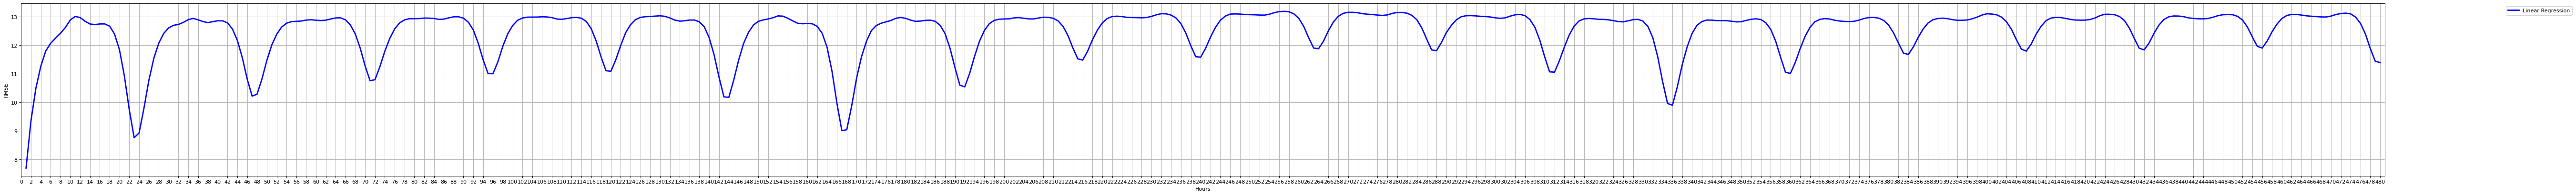

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 480

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (10999, 15)
Testing MSE  142.20848056024934
Testing RMSE  11.925119729388436
Testing MAE  8.808146090175072
Shape = (10998, 15)
Testing MSE  131.9061569032162
Testing RMSE  11.48504057037746
Testing MAE  8.800254000440551
Shape = (10997, 15)
Testing MSE  125.00564257028634
Testing RMSE  11.180592228065844
Testing MAE  8.711985868248
Shape = (10996, 15)
Testing MSE  121.11378117251517
Testing RMSE  11.00517065621952
Testing MAE  8.55538564790759
Shape = (10995, 15)
Testing MSE  119.44881353830797
Testing RMSE  10.929264089512522
Testing MAE  8.397760610415911
Shape = (10994, 15)
Testing MSE  121.61038193233966
Testing RMSE  11.027709731958838
Testing MAE  8.372347705791029
Shape = (10993, 15)
Testing MSE  125.70566055666369
Testing RMSE  11.211853573636416
Testing MAE  8.478893632293918
Shape = (10992, 15)
Testing MSE  128.39520246526212
Testing RMSE  11.33116068482228
Testing MAE  8.560876310069311
Shape = (10991, 15)
Testing MSE  128.6226263640399
Testing RMSE  11.341191576022

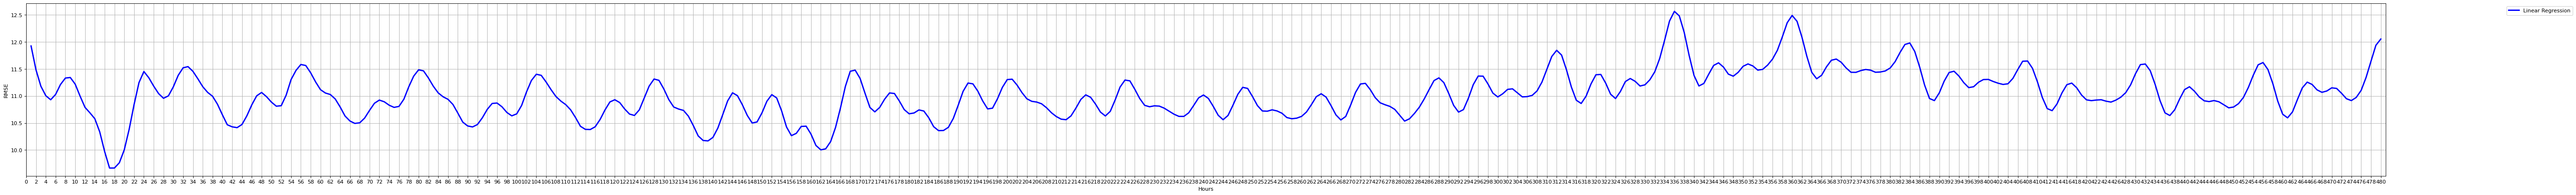

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 480

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/Extend_FI.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%m/%d/%Y %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    #X_temp1 = First['FI']
    #X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
    X_temp2 = First.drop(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell'], axis=1)
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    #X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

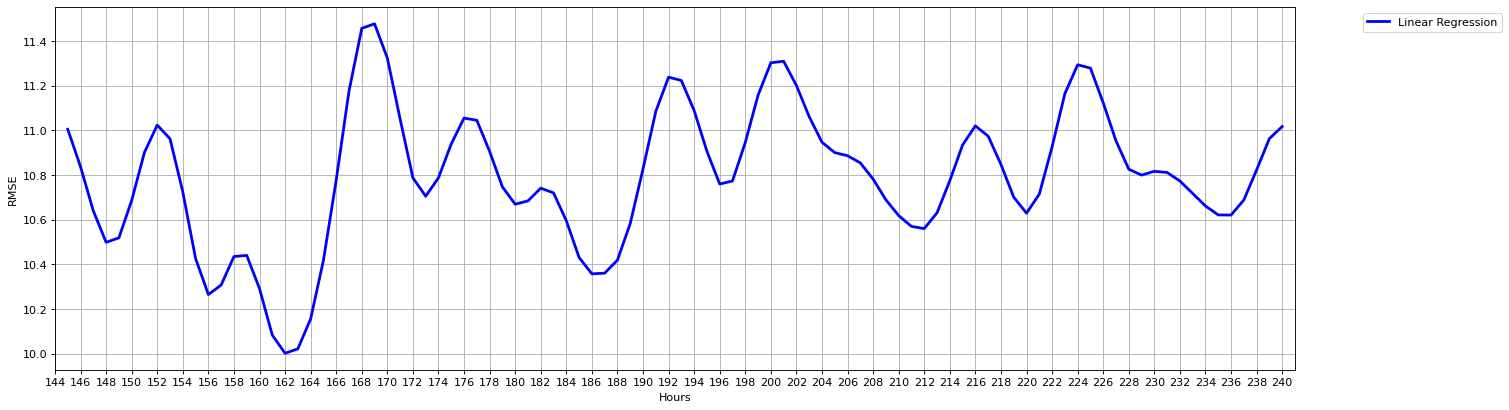

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE[144:240]))+145, LRhourpreRMSE[144:240], color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(144, 241)  
plt.xticks(np.arange(144, len(LRhourpreRMSE[144:240])+145, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

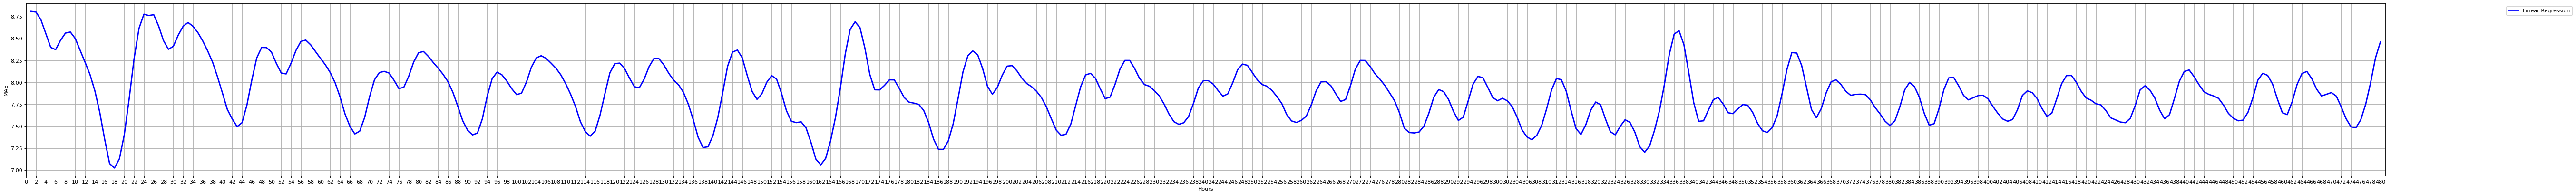

In [ ]:
plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMAE))+1, LRhourpreMAE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MAE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMAE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

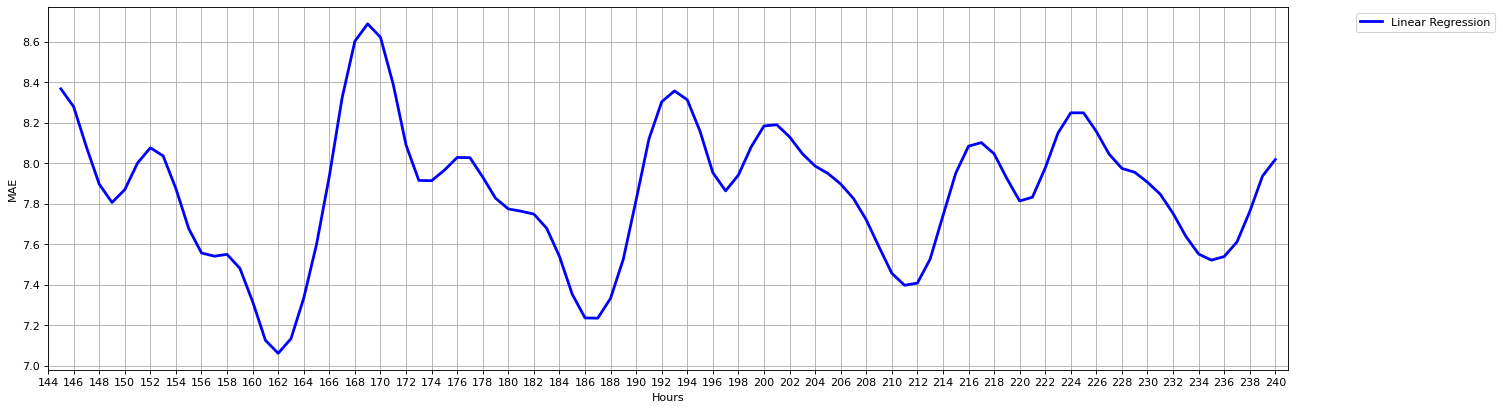

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMAE[144:240]))+145, LRhourpreMAE[144:240], color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MAE')
plt.grid(linestyle='-')
plt.xlim(144, 241)  
plt.xticks(np.arange(144, len(LRhourpreMAE[144:240])+145, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (10999, 10)
Testing MSE  56.81235357456361
Testing RMSE  7.537397002584089
Testing MAE  4.766971166065278
Shape = (10998, 10)
Testing MSE  79.58277783065132
Testing RMSE  8.920917992597586
Testing MAE  5.913698122126929
Shape = (10997, 10)
Testing MSE  92.71266207900499
Testing RMSE  9.628741458726836
Testing MAE  6.5452850188909055
Shape = (10996, 10)
Testing MSE  97.9133000696387
Testing RMSE  9.895114959900097
Testing MAE  6.839686344903912
Shape = (10995, 10)
Testing MSE  96.86182817478964
Testing RMSE  9.841840690378485
Testing MAE  6.867598091411764
Shape = (10994, 10)
Testing MSE  94.95882662873855
Testing RMSE  9.744681966526079
Testing MAE  6.843343146871265
Shape = (10993, 10)
Testing MSE  91.71511359712615
Testing RMSE  9.576800801787941
Testing MAE  6.709184128777693
Shape = (10992, 10)
Testing MSE  89.96230357279167
Testing RMSE  9.484845996261177
Testing MAE  6.630711255485793
Shape = (10991, 10)
Testing MSE  88.08481018298846
Testing RMSE  9.38535082897749
Testin

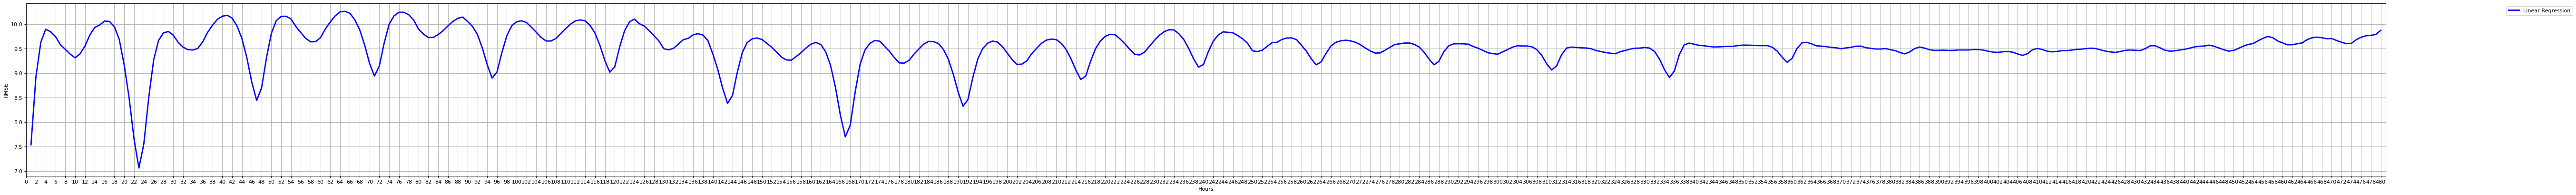

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 480

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/Time_FI.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%m/%d/%Y %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    #X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
    #X_temp2 = First.drop(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell'], axis=1)
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (10999, 29)
Testing MSE  59.957024115274066
Testing RMSE  7.743192114062137
Testing MAE  5.433250823905179
Shape = (10998, 29)
Testing MSE  88.58359223802901
Testing RMSE  9.411885689808871
Testing MAE  7.199346152084946
Shape = (10997, 29)
Testing MSE  108.71559325795505
Testing RMSE  10.426676999790251
Testing MAE  8.40635487372719
Shape = (10996, 29)
Testing MSE  119.4216285995421
Testing RMSE  10.928020342200233
Testing MAE  9.07377757792621
Shape = (10995, 29)
Testing MSE  124.80732937791281
Testing RMSE  11.171720072482698
Testing MAE  9.445535405291897
Shape = (10994, 29)
Testing MSE  126.80481871446956
Testing RMSE  11.260764570599527
Testing MAE  9.57383042608246
Shape = (10993, 29)
Testing MSE  128.68988386339268
Testing RMSE  11.344156375129561
Testing MAE  9.669239408029725
Shape = (10992, 29)
Testing MSE  130.70252642509027
Testing RMSE  11.432520563073144
Testing MAE  9.769291316962075
Shape = (10991, 29)
Testing MSE  133.0164813077146
Testing RMSE  11.53327712784

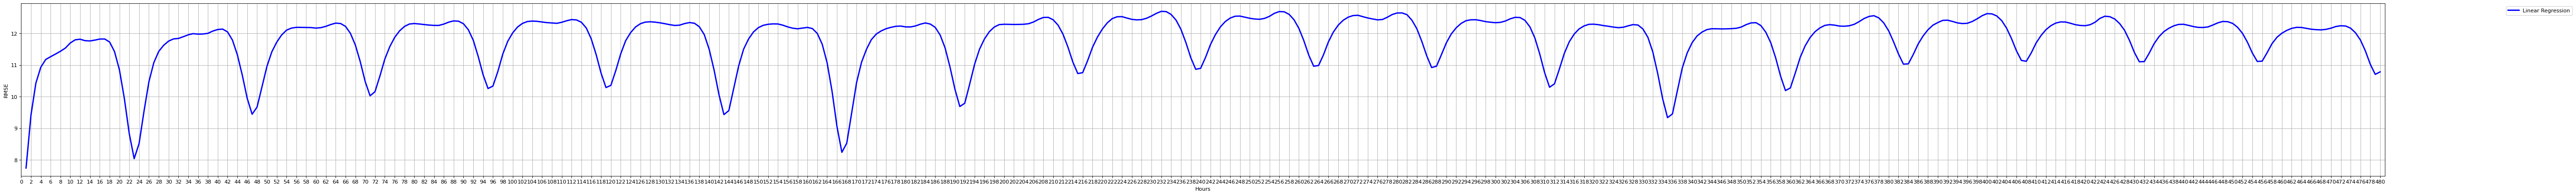

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 480

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    #X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
    X_temp2 = X_temp2.drop(['Working_Time'], axis=1)
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


GBMhourpreRMSE = []
GBMhourpreMAE = []
Hour_ahead = 48
for a in range(Hour_ahead):

    hour_ahead = a+1+144
    n_estimators = 98
    learning_rate = 0.01
    Depth = 10
    Min_leaf = 256

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))



    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)



    class DecisionTree():
        def __init__(self, x, y, n_features, f_idxs, idxs=None, depth=3, min_leaf=5):
            if idxs is None: idxs=np.arange(len(y))
            self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
            self.depth = depth
            #print(f_idxs)
            #         print(self.depth)
            self.n_features = n_features
            self.n, self.c = len(idxs), x.shape[1]
            self.val = np.mean(y[idxs])
            self.score = float('inf')
            self.find_varsplit()

        def find_varsplit(self):
            for i in self.f_idxs: self.find_better_split(i)
            if self.is_leaf: return
            x = self.split_col
            lhs = np.nonzero(x <= self.split)[0]
            rhs = np.nonzero(x > self.split)[0]
            lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)

        def find_better_split(self, var_idx):
            x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
            sort_idx = np.argsort(x)
            sort_y, sort_x = y[sort_idx], x[sort_idx]
            rhs_sum2: object
            rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y ** 2).sum()
            lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

            for i in range(0, self.n - self.min_leaf - 1):
                xi, yi = sort_x[i], sort_y[i]
                lhs_cnt += 1
                rhs_cnt -= 1
                lhs_sum += yi
                rhs_sum -= yi
                lhs_sum2 += yi ** 2
                rhs_sum2 -= yi ** 2
                if i < self.min_leaf or xi == sort_x[i + 1]:
                    continue

                lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
                rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
                curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
                if curr_score < self.score:
                    self.var_idx, self.score, self.split = var_idx, curr_score, xi

        @property
        def split_name(self):
            return self.x.columns[self.var_idx]

        @property
        def split_col(self):
            return self.x[self.idxs, self.var_idx]

        @property
        def is_leaf(self):
            return self.score == float('inf') or self.depth <= 0

        def predict(self, x):
            return np.array([self.predict_row(xi) for xi in x])

        def predict_row(self, xi):
            if self.is_leaf: return self.val
            t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
            return t.predict_row(xi)

    def std_agg(cnt, s1, s2):
        try:
            return math.sqrt((s2 / cnt) - (s1 / cnt) ** 2)
        except:
            return 0

    xi = X_train
    train_index = X_train.shape
    yi = y_train - np.mean(y_train)
    ei = 0  # initialization of error
    predf = np.mean(y_train)  # initial prediction 0


    def create_tree(x, y, n_features, sample_sz, depth=3, min_leaf=5):
        idxs = np.random.permutation(len(y))[:sample_sz]
        f_idxs = np.random.permutation(x.shape[1])[:n_features]
        return DecisionTree(x[idxs], y[idxs], n_features, f_idxs,
                            idxs=np.array(range(sample_sz)), depth=depth, min_leaf=min_leaf)


    print("hour_ahead = " + str(hour_ahead))
    print("n_estimators = " + str(n_estimators))
    print("learning_rate = " + str(learning_rate))
    print("Depth = " + str(Depth))
    print("Min_leaf = " + str(Min_leaf))


    trees = []
    for i in range(n_estimators):
        tree = create_tree(xi, yi, train_index[1], train_index[0], depth=Depth, min_leaf=Min_leaf)
        predi = tree.predict(xi)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_train, predf)))
        ei = y_train - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop
        trees.append(tree)


    MSE = mean_squared_error(y_train, predf, squared=True)
    print("Training MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Training RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_train, predf)
    print("Training MAE  " + str(MAE))



    xi = X_test
    train_index = X_test.shape
    yi = y_test - np.mean(y_test)
    ei = 0  # initialization of error
    predf = np.mean(y_test)

    i = 0
    for t in trees:
        predi = t.predict(X_test)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_test, predf)))
        ei = y_test - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop

        #if i == 6:
        #   break
        i += 1


    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    GBMhourpreRMSE.append(RMSE)
    GBMhourpreMAE.append(MAE)

print(GBMhourpreRMSE)
print(GBMhourpreMAE)



เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
74  6.59830278809577
75  6.591820962272457
76  6.584917335918446
77  6.578645139931946
78  6.572610502273457
79  6.566648244167681
80  6.560817368986754
81  6.554335065193747
82  6.548894930915143
83  6.5434439429721
84  6.5380776571958235
85  6.53288910977836
86  6.52680612471841
87  6.522099020858585
88  6.517072102481492
89  6.512233297181057
90  6.507414264581655
91  6.502751316602504
92  6.4969671114055965
93  6.492630481129674
94  6.488519099032625
95  6.484452948703482
96  6.479407611805892
97  6.474896917815231
Training MSE  106.59303266424045
Training RMSE  10.324390183649612
Training MAE  6.474896917815231
0  7.971442360672714
1  7.963997205886674
2  7.956675820808612
3  7.9494827917124855
4  7.94240384664577
5  7.935424407113862
6  7.932501475725847
7  7.926124590186886
8  7.923554547254429
9  7.917307072316241
10  7.914862199912356
11  7.908929936280933
12  7.906755255105671
13  7.900965190379078
14  7.899122858059851

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


GBMhourpreRMSE = []
GBMhourpreMAE = []
Hour_ahead = 48
for a in range(Hour_ahead):

    hour_ahead = a+1+192
    n_estimators = 98
    learning_rate = 0.01
    Depth = 10
    Min_leaf = 256

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))



    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)



    class DecisionTree():
        def __init__(self, x, y, n_features, f_idxs, idxs=None, depth=3, min_leaf=5):
            if idxs is None: idxs=np.arange(len(y))
            self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
            self.depth = depth
            #print(f_idxs)
            #         print(self.depth)
            self.n_features = n_features
            self.n, self.c = len(idxs), x.shape[1]
            self.val = np.mean(y[idxs])
            self.score = float('inf')
            self.find_varsplit()

        def find_varsplit(self):
            for i in self.f_idxs: self.find_better_split(i)
            if self.is_leaf: return
            x = self.split_col
            lhs = np.nonzero(x <= self.split)[0]
            rhs = np.nonzero(x > self.split)[0]
            lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
            self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth - 1,
                                    min_leaf=self.min_leaf)

        def find_better_split(self, var_idx):
            x, y = self.x[self.idxs, var_idx], self.y[self.idxs]
            sort_idx = np.argsort(x)
            sort_y, sort_x = y[sort_idx], x[sort_idx]
            rhs_sum2: object
            rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y ** 2).sum()
            lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

            for i in range(0, self.n - self.min_leaf - 1):
                xi, yi = sort_x[i], sort_y[i]
                lhs_cnt += 1
                rhs_cnt -= 1
                lhs_sum += yi
                rhs_sum -= yi
                lhs_sum2 += yi ** 2
                rhs_sum2 -= yi ** 2
                if i < self.min_leaf or xi == sort_x[i + 1]:
                    continue

                lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
                rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
                curr_score = lhs_std * lhs_cnt + rhs_std * rhs_cnt
                if curr_score < self.score:
                    self.var_idx, self.score, self.split = var_idx, curr_score, xi

        @property
        def split_name(self):
            return self.x.columns[self.var_idx]

        @property
        def split_col(self):
            return self.x[self.idxs, self.var_idx]

        @property
        def is_leaf(self):
            return self.score == float('inf') or self.depth <= 0

        def predict(self, x):
            return np.array([self.predict_row(xi) for xi in x])

        def predict_row(self, xi):
            if self.is_leaf: return self.val
            t = self.lhs if xi[self.var_idx] <= self.split else self.rhs
            return t.predict_row(xi)

    def std_agg(cnt, s1, s2):
        try:
            return math.sqrt((s2 / cnt) - (s1 / cnt) ** 2)
        except:
            return 0

    xi = X_train
    train_index = X_train.shape
    yi = y_train - np.mean(y_train)
    ei = 0  # initialization of error
    predf = np.mean(y_train)  # initial prediction 0


    def create_tree(x, y, n_features, sample_sz, depth=3, min_leaf=5):
        idxs = np.random.permutation(len(y))[:sample_sz]
        f_idxs = np.random.permutation(x.shape[1])[:n_features]
        return DecisionTree(x[idxs], y[idxs], n_features, f_idxs,
                            idxs=np.array(range(sample_sz)), depth=depth, min_leaf=min_leaf)


    print("hour_ahead = " + str(hour_ahead))
    print("n_estimators = " + str(n_estimators))
    print("learning_rate = " + str(learning_rate))
    print("Depth = " + str(Depth))
    print("Min_leaf = " + str(Min_leaf))


    trees = []
    for i in range(n_estimators):
        tree = create_tree(xi, yi, train_index[1], train_index[0], depth=Depth, min_leaf=Min_leaf)
        predi = tree.predict(xi)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_train, predf)))
        ei = y_train - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop
        trees.append(tree)


    MSE = mean_squared_error(y_train, predf, squared=True)
    print("Training MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Training RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_train, predf)
    print("Training MAE  " + str(MAE))



    xi = X_test
    train_index = X_test.shape
    yi = y_test - np.mean(y_test)
    ei = 0  # initialization of error
    predf = np.mean(y_test)

    i = 0
    for t in trees:
        predi = t.predict(X_test)
        predf = predf + learning_rate * predi
        print(str(i)+str("  ")+str(mean_absolute_error(y_test, predf)))
        ei = y_test - predf  # needed originl y here as residual always from original y
        yi = ei  # update yi as residual to reloop

        #if i == 6:
        #   break
        i += 1


    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))

    GBMhourpreRMSE.append(RMSE)
    GBMhourpreMAE.append(MAE)

print(GBMhourpreRMSE)
print(GBMhourpreMAE)



In [ ]:
GBMhourpreRMSE = [9.643139527095034, 9.936999381496005, 10.164063201779168, 10.382939702850058, 10.432954234661834, 10.42283644950174, 10.447856973287758, 10.509434023749922, 10.530664867685202, 10.717896171793674, 10.72768472209008, 10.696528920924573, 10.393987067429745, 10.491913207645926, 10.547986843566441, 10.513420832441595, 10.388751825994083, 10.321768975833452, 10.156428207502676, 9.763230613352466, 9.383385462628798, 8.843939378093372, 8.455783563010812, 8.67169665519098, 9.303362675397823, 9.730447879998746, 10.170753205812343, 10.369356225598768, 10.411614177853247, 10.480486291112307, 10.550281736122557, 10.632069473417172, 10.793552221327982, 10.701130971074797, 10.657197373075393, 10.549884324938349, 10.517043960362074, 10.45418774610684, 10.680647620814607, 10.676906009067318, 10.656623515483897, 10.466286930181566, 10.455390082513997, 10.120184922436547, 9.812003290393484, 9.48315270408561, 9.190821600863577, 9.271247150720363,9.628730798134763, 9.949960082421983, 10.19292578559727, 10.383234231126245, 10.428942654786328, 10.37694630114415, 10.649014870331754, 10.596771966535012, 10.391710369151332, 10.64183555674021, 10.737229578918999, 10.4792402542379, 10.439598284214602, 10.430805130158781, 10.46375567504972, 10.547921995828402, 10.493136351550374, 10.422954931643723, 10.352535499917808, 10.425460851311605, 10.127525524720747, 9.78935642718019, 9.61424604810426, 9.683224106200747, 9.973373782344261, 10.068211981883067, 10.260721194113678, 10.400409619680232, 10.442292982890462, 10.570546708426031, 10.674164552477697, 10.675009227504118, 10.629785087012772, 10.633131536502445, 10.794454254480248, 10.501492957476348, 10.396643841943737, 10.380644451156588, 10.395507595629567, 10.389595742548773, 10.403957155278663, 10.366181851079405, 10.363202762506742, 10.508876748844694, 10.398810525252998, 10.003597347185119, 9.846986554336892, 9.933798510596722]
GBMhourpreMAE = [6.42530129751005, 6.803395970398591, 7.6003304589387275, 7.957386518581919, 8.0295040427336, 7.994950024869543, 7.977962423676563, 7.998901771888757, 7.958594150133949, 8.149836598142787, 8.213920764933617, 8.217540053187212, 7.965103661652149, 8.061575589097538, 8.094259022274118, 8.06895142178671, 7.854590201474022, 7.550969021705404, 7.240432364602726, 6.7006378855283995, 6.263127633140756, 5.662473677219584, 5.233184414499566, 5.384351757768909, 5.971095137056477, 6.593872482809379, 7.54593828036021, 7.923383555315643, 8.002645884631391, 8.068957982492845, 8.122171866895444, 8.139170010249792, 8.201533141718757, 8.166966818579997, 8.135600330890878, 8.056439364174977, 8.065920327584925, 8.099715901676129, 8.314802019351418, 8.227105034133887, 8.198531076316428, 7.935620254213465, 7.735007088743969, 7.407049683859057, 6.875241848736244, 6.615385926918671, 6.1914388507487175, 6.32769104932932, 6.712768915274765, 7.34013569017893, 7.685683306253854, 7.942807524193191, 8.005204254982162, 7.938628504933097, 8.181853008101319, 8.106481853565084, 7.914180004588279, 8.073974550644046, 8.207363123394964, 8.048198980559384, 8.030144731852017, 8.005518153951312, 8.05300249811801, 8.136406522372774, 8.063644590977615, 7.953725895177001, 7.733659642452428, 7.511193315737887, 7.147335005014427, 6.806420535270074, 6.46806244584481, 6.6213555529343955, 7.040244301657827, 7.485247901278038, 7.790785556673027, 7.984090223289441, 8.034377828489866, 8.163340669986226, 8.240020249635789, 8.243237363108776, 8.166391567102366, 8.107574220833708, 8.23828741222272, 8.069668092014734, 7.996157317316358, 7.977642342857445, 7.995762577211801, 7.997998674356439, 8.02028436241698, 7.970197469014481, 7.918921519134999, 7.801101036777477, 7.657062067876984, 7.1205859675530245, 7.019680371012014, 7.134340694273098]

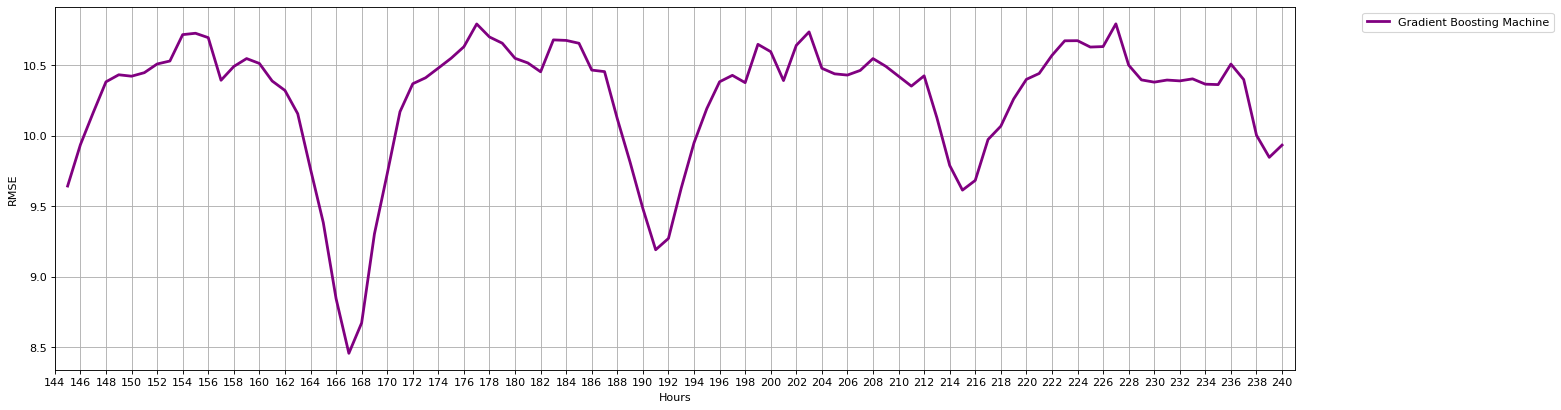

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(np.arange(len(GBMhourpreRMSE))+145, GBMhourpreRMSE, color="purple", linewidth=2.5, linestyle="-", label='Gradient Boosting Machine')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(144, 241)  
plt.xticks(np.arange(144, len(GBMhourpreRMSE)+145, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

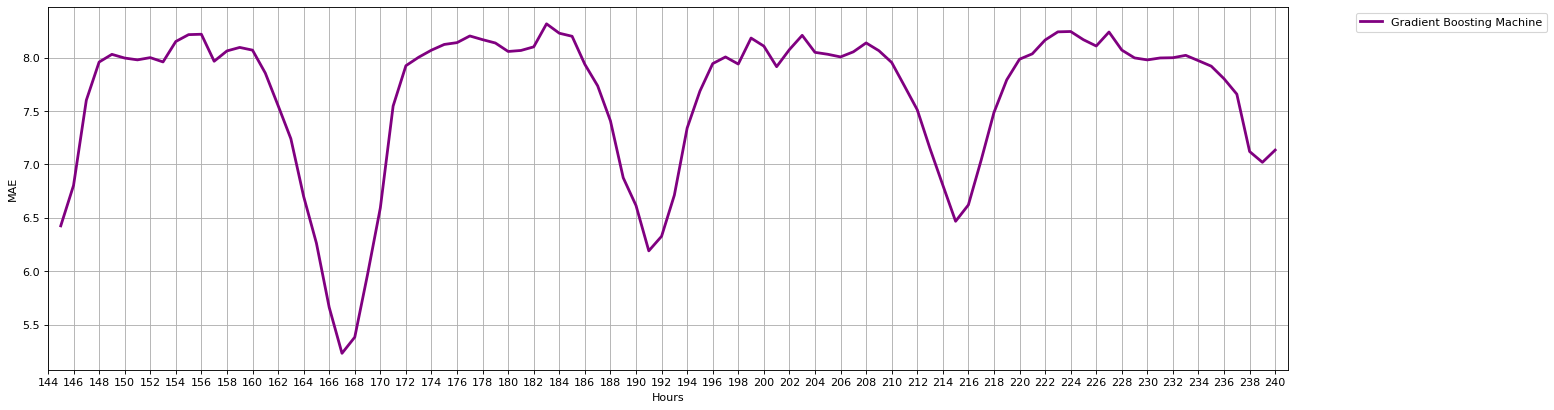

In [ ]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(np.arange(len(GBMhourpreMAE))+145, GBMhourpreMAE, color="purple", linewidth=2.5, linestyle="-", label='Gradient Boosting Machine')
plt.xlabel('Hours')
plt.ylabel('MAE')
plt.grid(linestyle='-')
plt.xlim(144, 241)  
plt.xticks(np.arange(144, len(GBMhourpreRMSE)+145, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (11000, 30)
Testing MSE  59.22163257056734
Testing RMSE  7.695559276008947
Testing MAE  5.444019310754613
Shape = (11000, 30)
Testing MSE  87.45201206188354
Testing RMSE  9.35157805195912
Testing MAE  7.273488781921703
Shape = (11000, 30)
Testing MSE  110.09129364638561
Testing RMSE  10.492439832869456
Testing MAE  8.574947430626494
Shape = (11000, 30)
Testing MSE  126.82603174856023
Testing RMSE  11.261706431467667
Testing MAE  9.358352689983999
Shape = (11000, 30)
Testing MSE  139.12306752795624
Testing RMSE  11.795044193556725
Testing MAE  9.802340153201781
Shape = (11000, 30)
Testing MSE  145.61733897399904
Testing RMSE  12.067200958548716
Testing MAE  9.972953154786985
Shape = (11000, 30)
Testing MSE  150.02061735734816
Testing RMSE  12.248290385084285
Testing MAE  10.063546496090837
Shape = (11000, 30)
Testing MSE  154.26744719911943
Testing RMSE  12.42044472630185
Testing MAE  10.13044733130041
Shape = (11000, 30)
Testing MSE  159.28496491816006
Testing RMSE  12.62081474

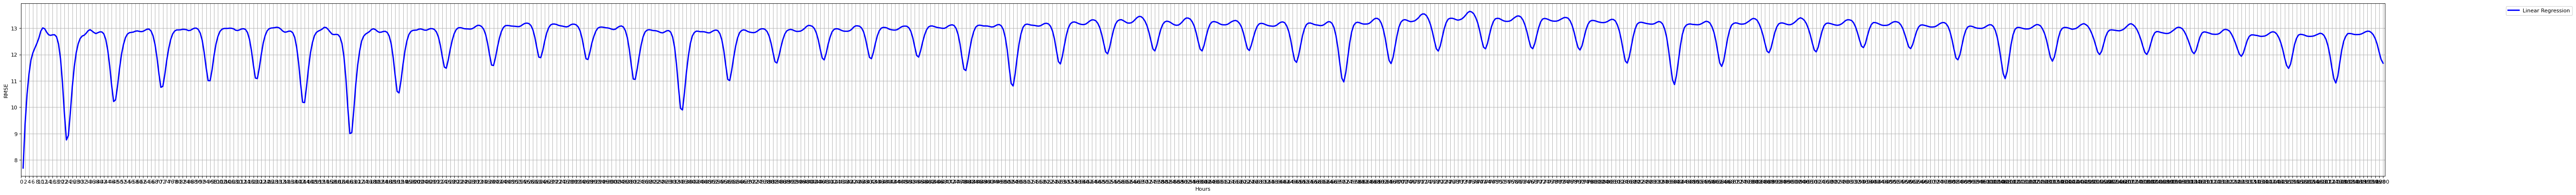

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 1200

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Testing RMSE  11.86518258462619
Testing MAE  10.142769034949442
Shape = (11000, 30)
Testing MSE  134.24736869448742
Testing RMSE  11.586516676485967
Testing MAE  9.893164378719552
Shape = (11000, 30)
Testing MSE  131.6209813096557
Testing RMSE  11.472618764242787
Testing MAE  9.798052738776793
Shape = (11000, 30)
Testing MSE  135.47291348322506
Testing RMSE  11.639283203154095
Testing MAE  9.968184076954795
Shape = (11000, 30)
Testing MSE  143.89792499969982
Testing RMSE  11.99574612100889
Testing MAE  10.30574194003676
Shape = (11000, 30)
Testing MSE  153.06754758780255
Testing RMSE  12.372047024959231
Testing MAE  10.633743956601732
Shape = (11000, 30)
Testing MSE  158.99179047183685
Testing RMSE  12.609194679750045
Testing MAE  10.820572921584032
Shape = (11000, 30)
Testing MSE  162.23191960915827
Testing RMSE  12.737029465662639
Testing MAE  10.913956936441519
Shape = (11000, 30)
Testing MSE  162.95476050211613
Testing RMSE  

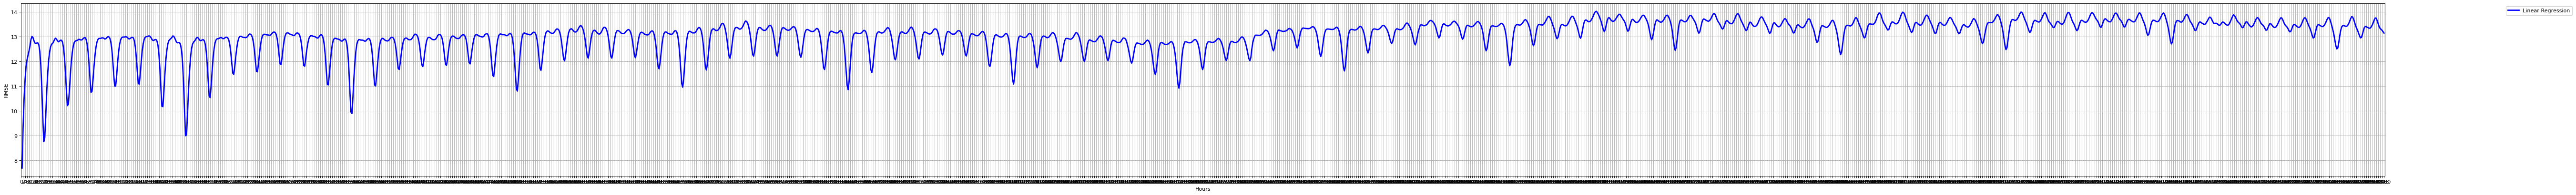

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 2400

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (11000, 30)
Testing MSE  59.22163257056734
Testing RMSE  7.695559276008947
Testing MAE  5.444019310754613
Shape = (11000, 30)
Testing MSE  87.45201206188354
Testing RMSE  9.35157805195912
Testing MAE  7.273488781921703
Shape = (11000, 30)
Testing MSE  110.09129364638561
Testing RMSE  10.492439832869456
Testing MAE  8.574947430626494
Shape = (11000, 30)
Testing MSE  126.82603174856023
Testing RMSE  11.261706431467667
Testing MAE  9.358352689983999
Shape = (11000, 30)
Testing MSE  139.12306752795624
Testing RMSE  11.795044193556725
Testing MAE  9.802340153201781
Shape = (11000, 30)
Testing MSE  145.61733897399904
Testing RMSE  12.067200958548716
Testing MAE  9.972953154786985
Shape = (11000, 30)
Testing MSE  150.02061735734816
Testing RMSE  12.248290385084285
Testing MAE  10.063546496090837
Shape = (11000, 30)
Testing MSE  154.26744719911943
Testing RMSE  12.42044472630185
Testing MAE  10.13044733130041
Shape = (11000, 30)
Testing MSE  159.28496491816006
Testing RMSE  12.62081474

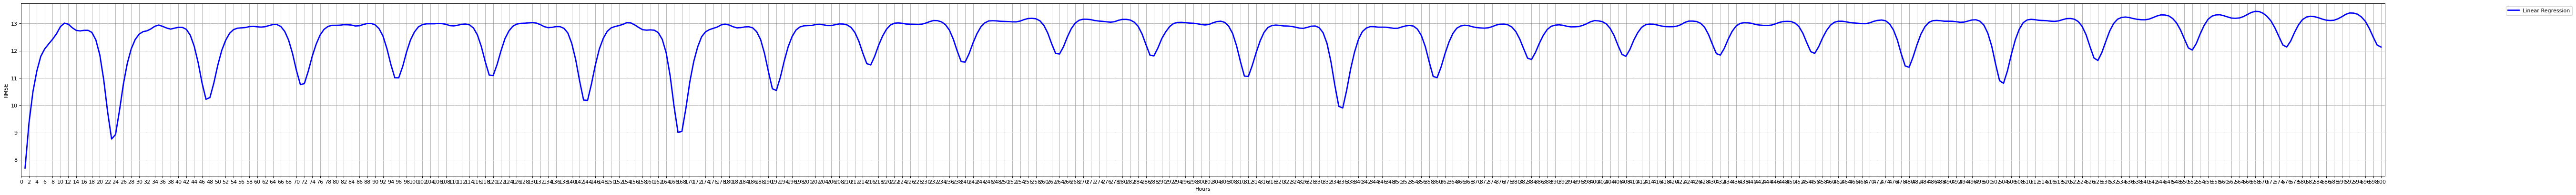

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 600

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
Testing RMSE  12.099917169532537
Testing MAE  10.40308789385613
Shape = (11000, 30)
Testing MSE  144.58632721968985
Testing RMSE  12.024405483003717
Testing MAE  10.361373373021978
Shape = (11000, 30)
Testing MSE  150.30618369159848
Testing RMSE  12.259942238509874
Testing MAE  10.614430382857478
Shape = (11000, 30)
Testing MSE  159.10364700578702
Testing RMSE  12.613629414478096
Testing MAE  10.941393845022551
Shape = (11000, 30)
Testing MSE  167.06762198130028
Testing RMSE  12.925464091524926
Testing MAE  11.17651559971382
Shape = (11000, 30)
Testing MSE  172.96252764254353
Testing RMSE  13.151521875529978
Testing MAE  11.332018915984069
Shape = (11000, 30)
Testing MSE  176.02806619986316
Testing RMSE  13.267556903961752
Testing MAE  11.418171836872878
Shape = (11000, 30)
Testing MSE  177.21079549321385
Testing RMSE  13.312054518113042
Testing MAE  11.472519461800362
Shape = (11000, 30)
Testing MSE  177.39268082056083
Testing R

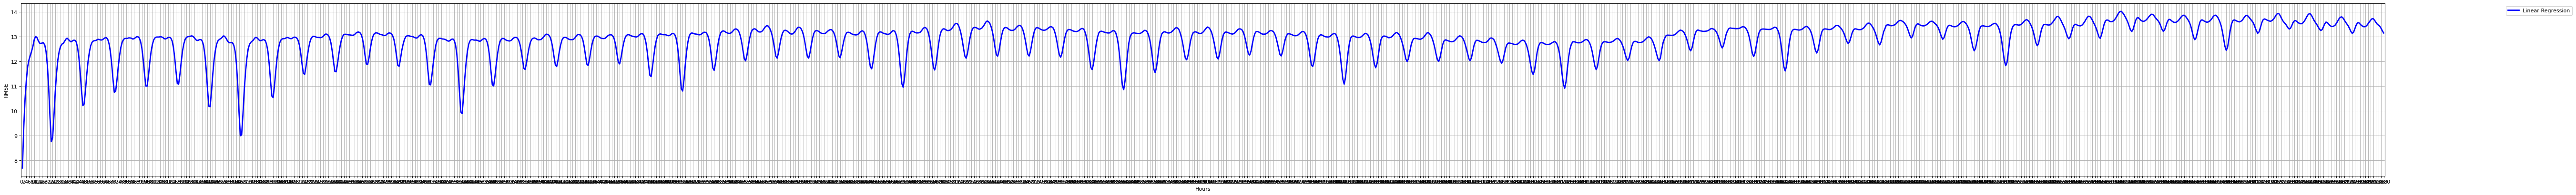

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 1800

LRhourpreRMSE = []
LRhourpreMAE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)

print(LRhourpreRMSE)
print(LRhourpreMAE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreRMSE))+1, LRhourpreRMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('RMSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreRMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (11000, 30)
Testing MSE  59.22163257056734
Testing RMSE  7.695559276008947
Testing MAE  5.444019310754613
Shape = (11000, 30)
Testing MSE  87.45201206188354
Testing RMSE  9.35157805195912
Testing MAE  7.273488781921703
Shape = (11000, 30)
Testing MSE  110.09129364638561
Testing RMSE  10.492439832869456
Testing MAE  8.574947430626494
Shape = (11000, 30)
Testing MSE  126.82603174856023
Testing RMSE  11.261706431467667
Testing MAE  9.358352689983999
Shape = (11000, 30)
Testing MSE  139.12306752795624
Testing RMSE  11.795044193556725
Testing MAE  9.802340153201781
Shape = (11000, 30)
Testing MSE  145.61733897399904
Testing RMSE  12.067200958548716
Testing MAE  9.972953154786985
Shape = (11000, 30)
Testing MSE  150.02061735734816
Testing RMSE  12.248290385084285
Testing MAE  10.063546496090837
Shape = (11000, 30)
Testing MSE  154.26744719911943
Testing RMSE  12.42044472630185
Testing MAE  10.13044733130041
Shape = (11000, 30)
Testing MSE  159.28496491816006
Testing RMSE  12.62081474

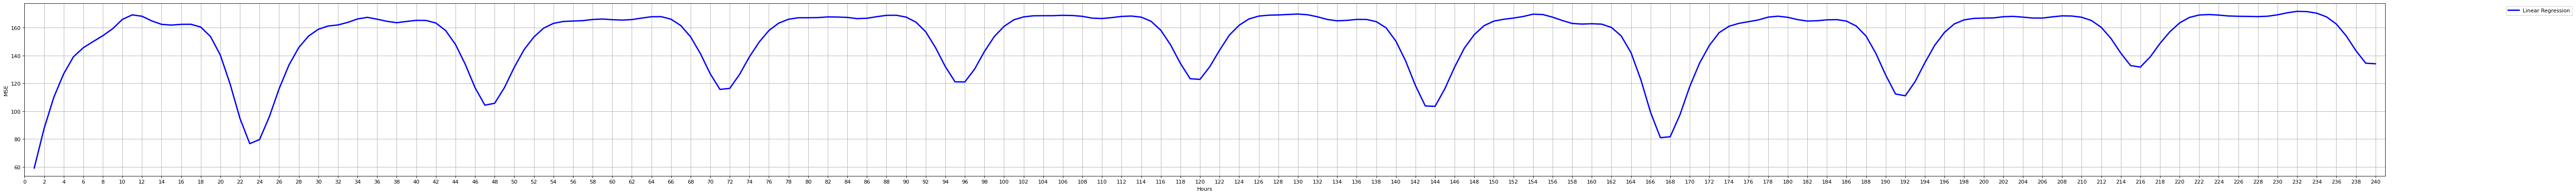

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 240

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)

print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error





hour = [1,6,12,18,24]

for a in range(len(hour)):
    hour_ahead = hour[a]

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)

    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    #Y = Y.to_numpy()
    #Y.reset_index(drop=True, inplace=True)
    #Y.columns = [''] * len(Y.columns)


    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    #X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
    #X_temp2 = First.drop(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell'], axis=1)
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    #X = X.to_numpy()
    #X.reset_index(drop=True, inplace=True)
    #X.columns = [''] * len(X.columns)
    #Pred_index = X.shape
    #print("Shape = "+str(Pred_index))
    print(X.var())



FI                               135.424960
3_Precipitation amount (mm)        1.333549
3_Air temperature (degC)          85.576667
5_Precipitation amount (mm)        1.324802
6_Cloud amount (1/8)              12.541707
20_Precipitation amount (mm)       1.457677
41_Wind speed (m/s)                3.472924
42_Wind speed (m/s)                4.876058
46_Precipitation amount (mm)       1.401683
47_Precipitation amount (mm)       1.316883
62_Wind speed (m/s)                3.601857
77_Wind speed (m/s)                6.703520
95_Air temperature (degC)        114.382707
98_Precipitation amount (mm)       1.442037
99_Wind speed (m/s)                4.808469
105_Air temperature (degC)       105.121931
110_Precipitation amount (mm)      1.417740
120_Air temperature (degC)       108.027060
124_Air temperature (degC)        86.460822
124_Wind speed (m/s)               5.007567
131_Precipitation amount (mm)      1.379599
141_Air temperature (degC)       130.818786
143_Wind speed (m/s)            

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




hour_ahead = 0

path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
Merge_all = pd.read_csv(path)
dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
Merge_all.set_index(pd.Index(dti), inplace=True)
Merge_all.drop(['DateTime'], axis=1, inplace=True)

First = Merge_all.iloc[0:11000, :]
N_index = First.shape
Y_temp = First['FI']
Y = Y_temp.iloc[hour_ahead:N_index[0]]
#Y = Y.to_numpy()
#Y.reset_index(drop=True, inplace=True)
#Y.columns = [''] * len(Y.columns)


X_temp1 = First['FI']
X_temp2 = First.loc[:, First.columns != 'FI']
#X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
#X_temp2 = First.drop(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell'], axis=1)
X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
X_temp2.set_index(X_temp2_index, inplace=True)
X_temp1 = X_temp1.to_frame()
X_temp = X_temp1.join(X_temp2)
X = X_temp.iloc[0:N_index[0] - hour_ahead]
#X = X.to_numpy()
#X.reset_index(drop=True, inplace=True)
#X.columns = [''] * len(X.columns)
#Pred_index = X.shape
#print("Shape = "+str(Pred_index))


X_temp = X.copy()
X_temp['DateTime'] = X_temp.index
X_temp['hour'] = X_temp['DateTime'].dt.hour

hour = X_temp[X_temp["hour"] == 15]
print(hour)
print(hour.var())

                        FI  ...  hour
DateTime                    ...      
2013-01-01 15:00:00  33.64  ...    15
2013-01-02 15:00:00  40.33  ...    15
2013-01-03 15:00:00  36.77  ...    15
2013-01-04 15:00:00  36.84  ...    15
2013-01-05 15:00:00  36.79  ...    15
...                    ...  ...   ...
2014-03-30 15:00:00  29.54  ...    15
2014-03-31 15:00:00  37.51  ...    15
2014-04-01 15:00:00  32.82  ...    15
2014-04-02 15:00:00  30.21  ...    15
2014-04-03 15:00:00  31.97  ...    15

[458 rows x 32 columns]
FI                               108.158110
3_Precipitation amount (mm)        1.198439
3_Air temperature (degC)          89.419367
5_Precipitation amount (mm)        1.410721
6_Cloud amount (1/8)              13.156517
20_Precipitation amount (mm)       1.859629
41_Wind speed (m/s)                3.328971
42_Wind speed (m/s)                4.589354
46_Precipitation amount (mm)       1.437175
47_Precipitation amount (mm)       1.403463
62_Wind speed (m/s)                3.5407

Shape = (11000, 29)
Testing MSE  171.51156692064595
Testing RMSE  13.096242473345015
Testing MAE  11.058377303108461
Shape = (11000, 29)
Testing MSE  171.78704990059035
Testing RMSE  13.10675588773173
Testing MAE  11.070392649441247
Shape = (11000, 29)
Testing MSE  172.05771115735453
Testing RMSE  13.117077081322444
Testing MAE  11.082791359910871
Shape = (11000, 29)
Testing MSE  172.32502985340113
Testing RMSE  13.127262846968561
Testing MAE  11.095561987535964
Shape = (11000, 29)
Testing MSE  172.5180943147064
Testing RMSE  13.134614357289154
Testing MAE  11.105637420957672
Shape = (11000, 29)
Testing MSE  172.73090731637853
Testing RMSE  13.142713088110025
Testing MAE  11.1157008336379
Shape = (11000, 29)
Testing MSE  172.79238424789455
Testing RMSE  13.145051701986361
Testing MAE  11.1191102257471
Shape = (11000, 29)
Testing MSE  172.76820928935268
Testing RMSE  13.144132123854838
Testing MAE  11.117987726279528
Shape = (11000, 29)
Testing MSE  172.5901578176863
Testing RMSE  13.13

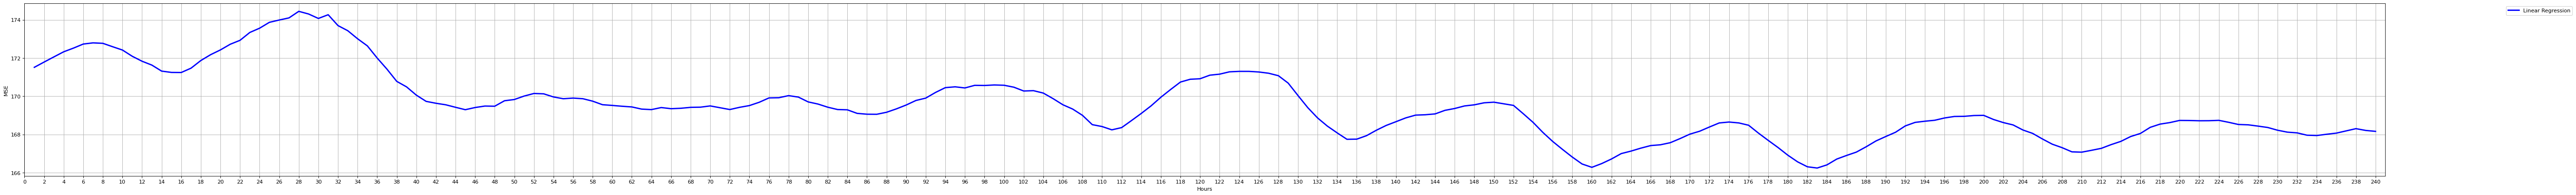

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 240

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.drop(['FI'], axis=1)

    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)

print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (11000, 1)
Testing MSE  59.747780367129174
Testing RMSE  7.729668839421853
Testing MAE  5.347693303830792
Shape = (11000, 1)
Testing MSE  87.54227441980501
Testing RMSE  9.35640285685717
Testing MAE  7.062676066486601
Shape = (11000, 1)
Testing MSE  106.39094806597168
Testing RMSE  10.314598783567478
Testing MAE  8.235114669379096
Shape = (11000, 1)
Testing MSE  115.98316852294377
Testing RMSE  10.769548204216543
Testing MAE  8.899417407789855
Shape = (11000, 1)
Testing MSE  119.94528905256786
Testing RMSE  10.951953663733601
Testing MAE  9.259410376763448
Shape = (11000, 1)
Testing MSE  121.41486734691489
Testing RMSE  11.018841470268773
Testing MAE  9.39709935901135
Shape = (11000, 1)
Testing MSE  122.60525963286477
Testing RMSE  11.072725935056136
Testing MAE  9.487609280467996
Shape = (11000, 1)
Testing MSE  124.3193524522311
Testing RMSE  11.14985885346676
Testing MAE  9.593609736556635
Shape = (11000, 1)
Testing MSE  126.26293781049726
Testing RMSE  11.236678237383915
Tes

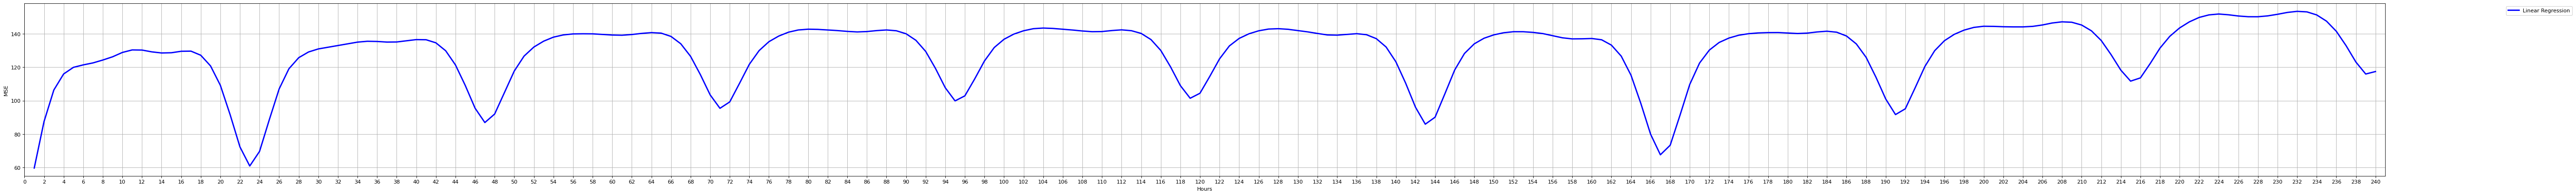

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 240

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.drop(First.columns.difference(['FI']), axis=1)

    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)

print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Shape = (11000, 1)
Testing MSE  59.747780367129174
Testing RMSE  7.729668839421853
Testing MAE  5.347693303830792
Shape = (11000, 1)
Testing MSE  87.54227441980501
Testing RMSE  9.35640285685717
Testing MAE  7.062676066486601
Shape = (11000, 1)
Testing MSE  106.39094806597168
Testing RMSE  10.314598783567478
Testing MAE  8.235114669379096
Shape = (11000, 1)
Testing MSE  115.98316852294377
Testing RMSE  10.769548204216543
Testing MAE  8.899417407789855
Shape = (11000, 1)
Testing MSE  119.94528905256786
Testing RMSE  10.951953663733601
Testing MAE  9.259410376763448
Shape = (11000, 1)
Testing MSE  121.41486734691489
Testing RMSE  11.018841470268773
Testing MAE  9.39709935901135
Shape = (11000, 1)
Testing MSE  122.60525963286477
Testing RMSE  11.072725935056136
Testing MAE  9.487609280467996
Shape = (11000, 1)
Testing MSE  124.3193524522311
Testing RMSE  11.14985885346676
Testing MAE  9.593609736556635
Shape = (11000, 1)
Testing MSE  126.26293781049726
Testing RMSE  11.236678237383915
Tes

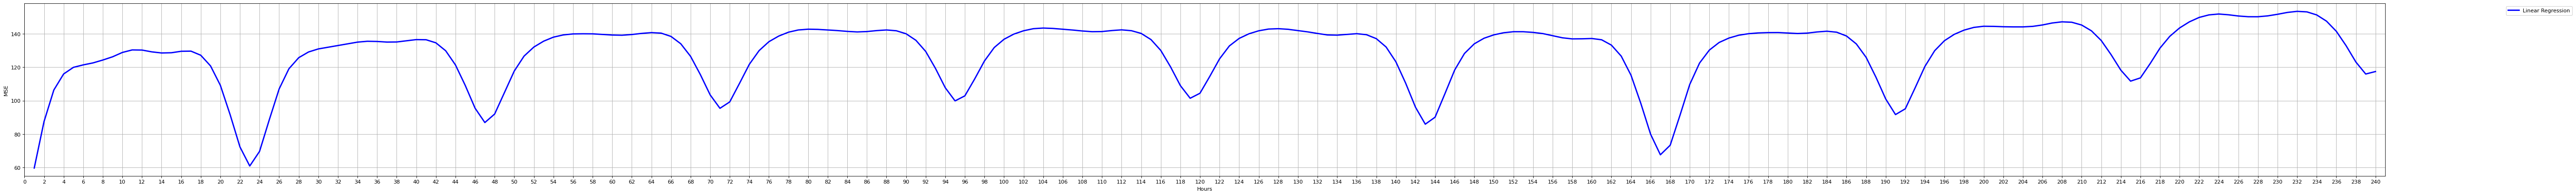

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 240

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.drop(First.columns.difference(['FI']), axis=1)

    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)

print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

0
               FI
count  459.000000
mean    33.317669
std      5.849916
min     10.630000
25%     29.690000
50%     33.570000
75%     36.785000
max     52.410000
1
               FI
count  460.000000
mean    32.163543
std      6.084388
min      8.510000
25%     28.142500
50%     32.335000
75%     35.822500
max     49.920000
2
               FI
count  460.000000
mean    31.450797
std      6.504410
min      7.600000
25%     27.455000
50%     31.675000
75%     35.477500
max     49.690000
3
               FI
count  458.000000
mean    31.406201
std      6.781247
min      4.030000
25%     27.372500
50%     31.560000
75%     35.352500
max     49.930000
4
               FI
count  458.000000
mean    32.307052
std      6.667928
min      2.810000
25%     28.392500
50%     32.295000
75%     36.147500
max     50.500000
5
               FI
count  458.000000
mean    35.874476
std     10.402519
min      1.700000
25%     31.330000
50%     35.160000
75%     39.142500
max    199.950000
6
              

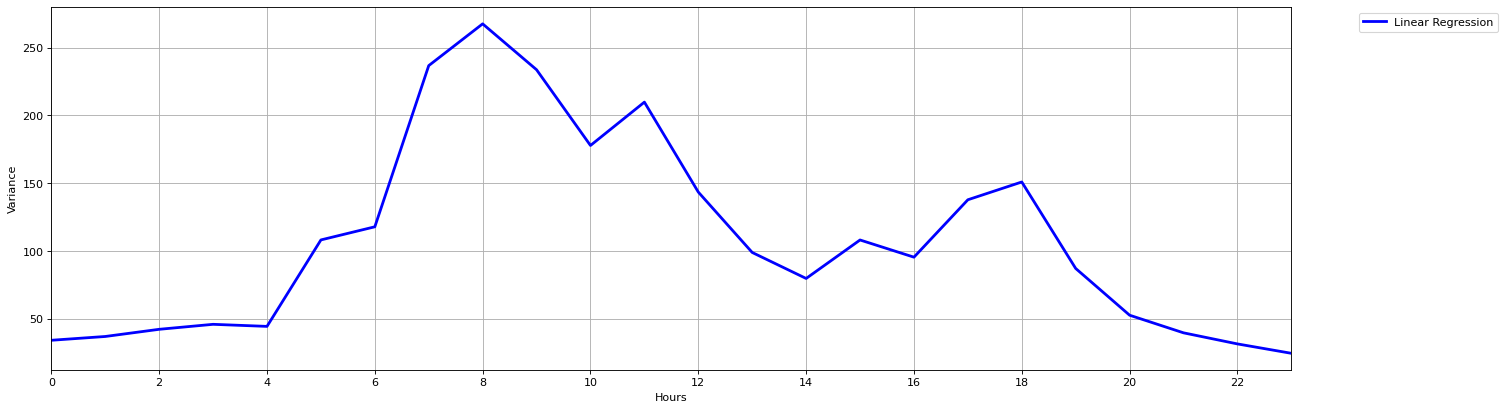

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




Hour_ahead = 24
VAR = []
for a in range(Hour_ahead):
    hour_ahead = a

    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)

    First = Merge_all.iloc[0:11000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    #Y = Y.to_numpy()
    #Y.reset_index(drop=True, inplace=True)
    #Y.columns = [''] * len(Y.columns)


    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    #X_temp1 = First.drop(First.columns.difference(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell']), axis=1)
    #X_temp2 = First.drop(['FI', 'C_SE1 > FI', 'C_FI > SE1', 'C_SE3 > FI', 'C_FI > SE3', 'C_EE > FI', 'C_FI > EE', 'F_FI > SE1', 'F_SE1 > FI', 'F_FI > SE3', 'F_SE3 > FI', 'F_FI > EE', 'F_EE > FI', 'FI Buy', 'FI Sell'], axis=1)
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    #X = X.to_numpy()
    #X.reset_index(drop=True, inplace=True)
    #X.columns = [''] * len(X.columns)
    #Pred_index = X.shape
    #print("Shape = "+str(Pred_index))


    X_temp = X.copy()
    X_temp['DateTime'] = X_temp.index
    X_temp['hour'] = X_temp['DateTime'].dt.hour

    hour = X_temp[X_temp["hour"] == a]
    hour = hour.drop(hour.columns.difference(['FI']), axis=1)
    print(hour_ahead)
    print(hour.describe())
    VAR.append(hour.var().get('FI'))
print(VAR)
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(np.arange(len(VAR)), VAR, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Variance')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead-1)  
plt.xticks(np.arange(0, len(VAR), 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

hour1
hour2
hour3
hour4
hour5
hour6
hour7
hour8
hour9
hour10
hour11
hour12
hour13
hour14
hour15
hour16
hour17
hour18
hour19
hour20
hour21


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


hour22


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


hour23


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


hour24


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


[7.729668839421853, 9.35640285685717, 10.314598783567478, 10.769548204216543, 10.951953663733601, 11.018841470268773, 11.072725935056136, 11.14985885346676, 11.236678237383915, 11.351656516608971, 11.417692452092606, 11.414222077622613, 11.366986438046345, 11.337678434642342, 11.343623545100199, 11.382236914393994, 11.385803658840494, 11.277816704279134, 10.989993800236011, 10.449829745700091, 9.570674760615626, 8.507436577249612, 7.807981858156469, 8.34868622704819]
[5.347693303830792, 7.062676066486601, 8.235114669379096, 8.899417407789855, 9.259410376763448, 9.39709935901135, 9.487609280467996, 9.593609736556635, 9.676599979042555, 9.755922322052486, 9.829686496118086, 9.839837074266644, 9.81392619443318, 9.797631077817787, 9.805404490540802, 9.821005597926382, 9.804188619587558, 9.674390074467714, 9.330214543896131, 8.734453880047893, 7.841946262006965, 6.781768019261639, 5.992568333036462, 6.446145618421728]
[59.747780367129174, 87.54227441980501, 106.39094806597168, 115.983168522

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


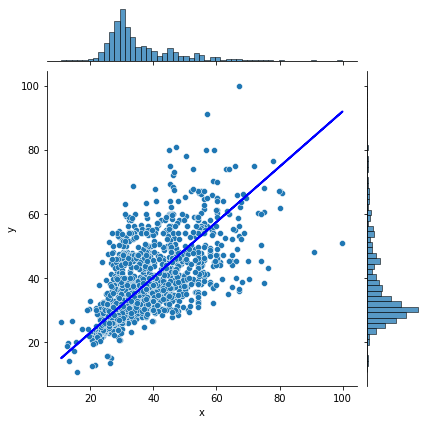

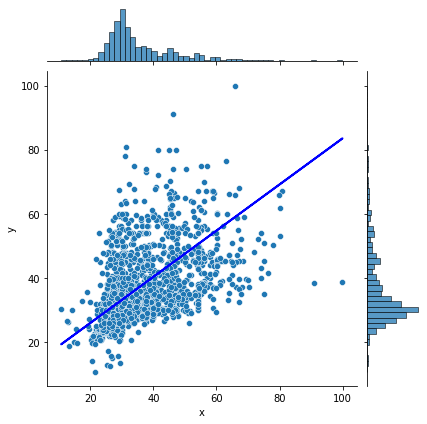

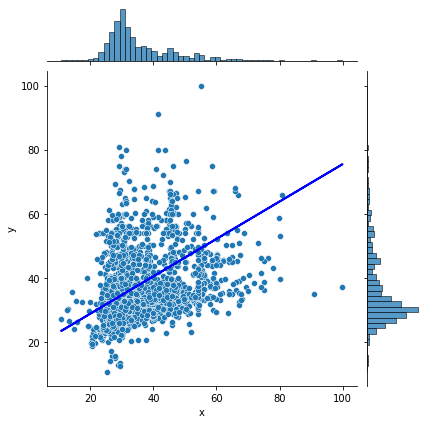

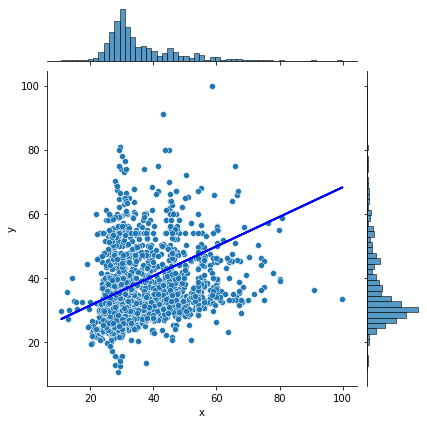

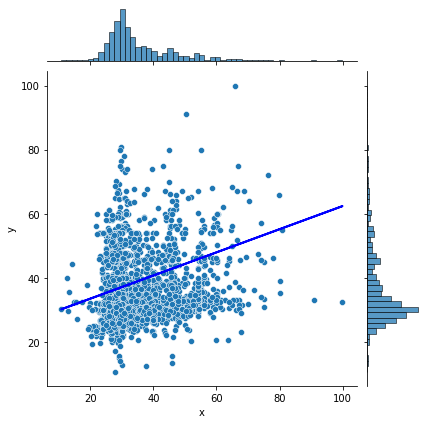

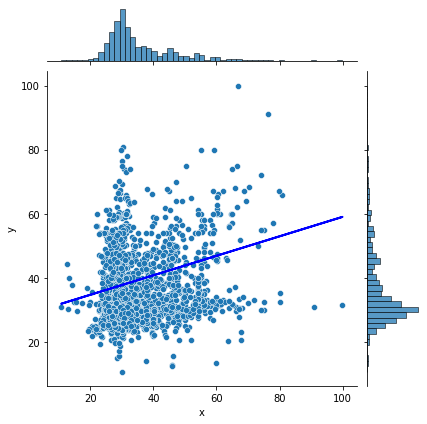

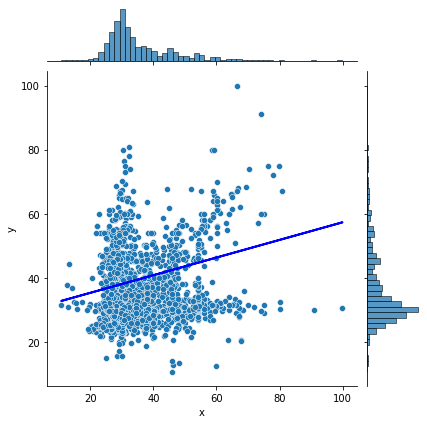

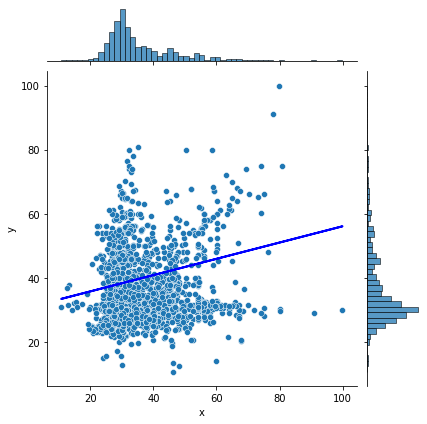

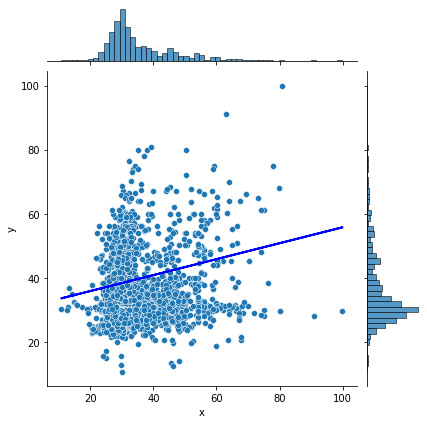

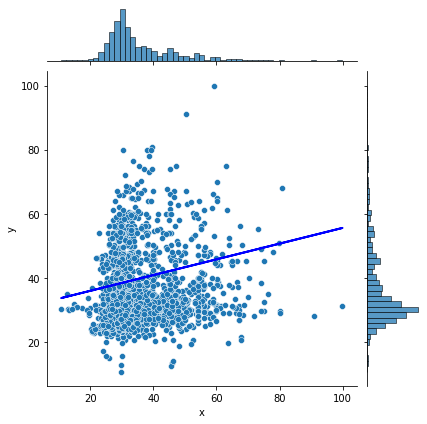

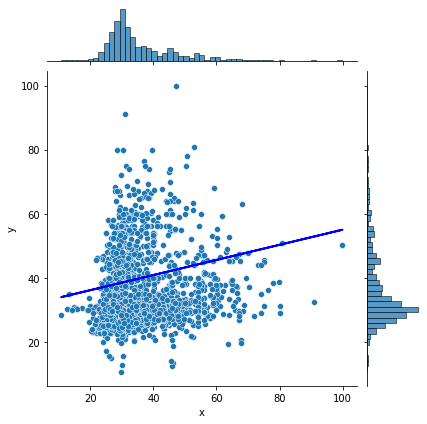

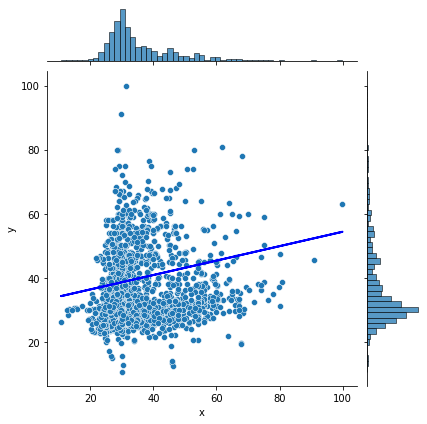

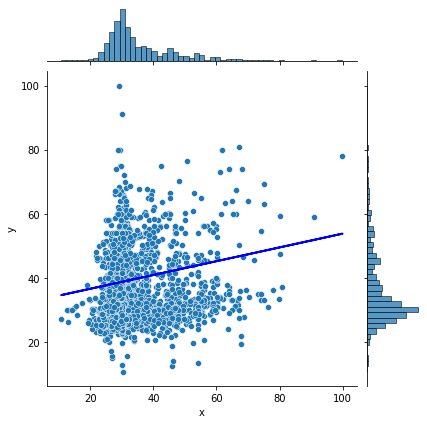

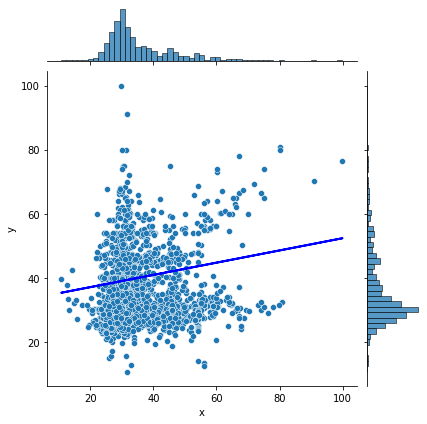

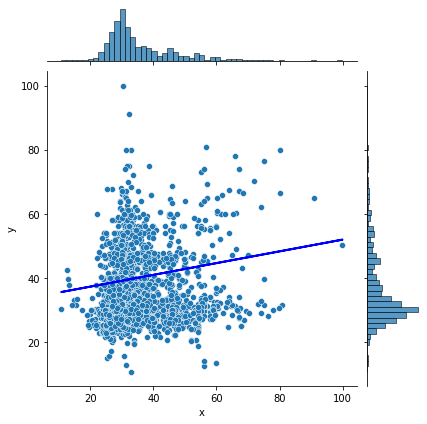

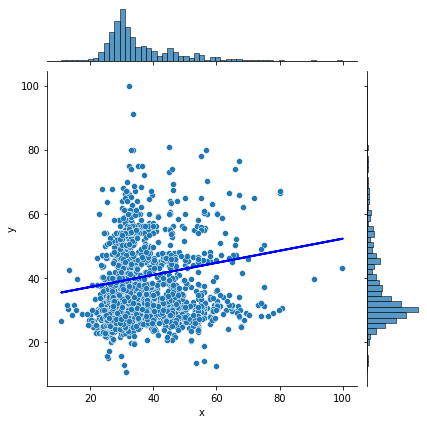

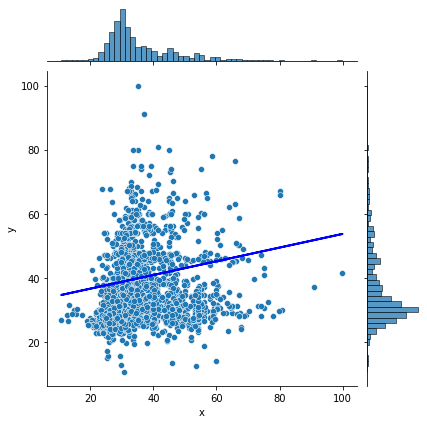

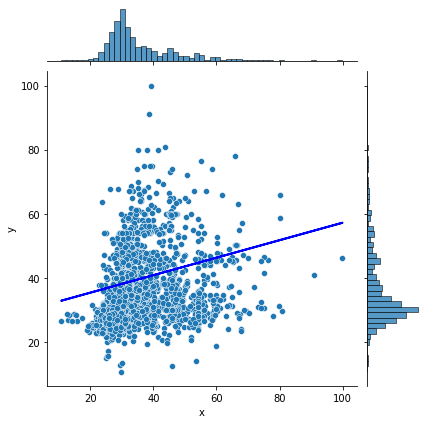

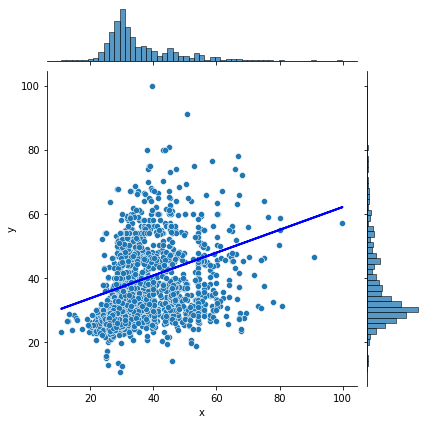

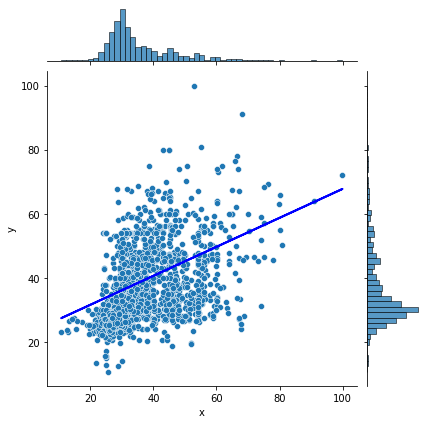

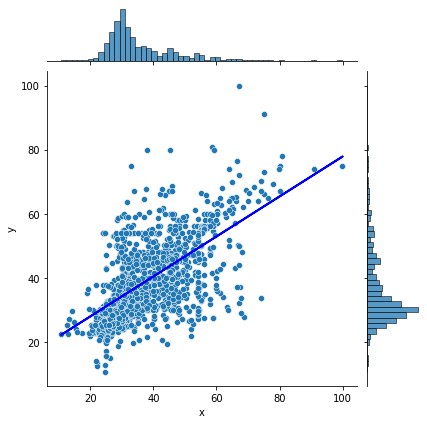

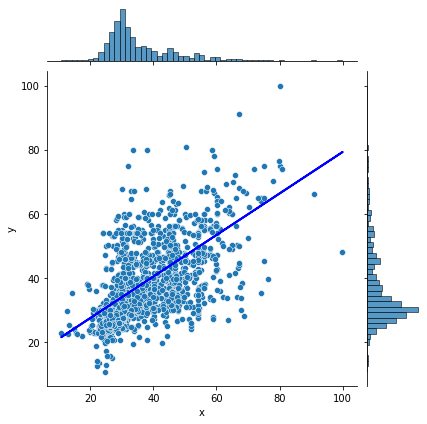

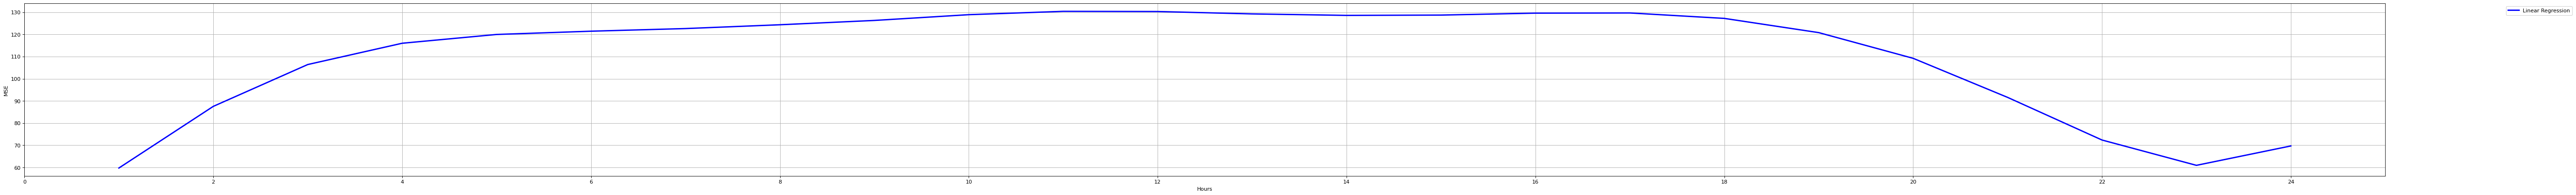

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 24

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.drop(First.columns.difference(['FI']), axis=1)

    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    #print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    #print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    #print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    #print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)
    print("hour"+str(a+1))
    #plt.figure(figsize=(5, 5), dpi=80)
    #plt.scatter(X_test, y_test, c="c", s=4)
    #plt.plot(X_test, predf, '-', color='black');
    #plt.show()
    
    df = pd.DataFrame(X_test, columns=['x'])
    df['y'] = y_test
    plot = sns.jointplot(data=df, x="x", y="y")
    plot.ax_joint.plot(X_test, predf, 'b-', linewidth = 2)



print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

hour1


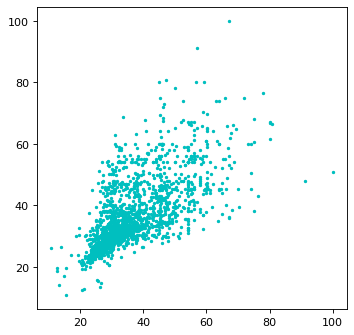

hour2


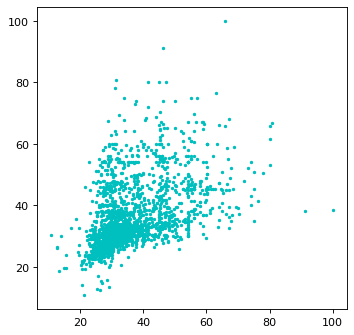

hour3


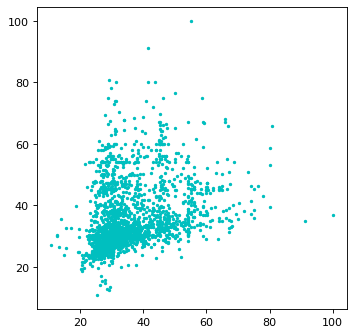

hour4


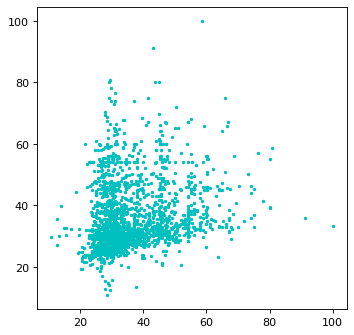

hour5


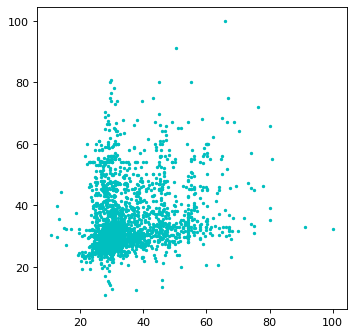

hour6


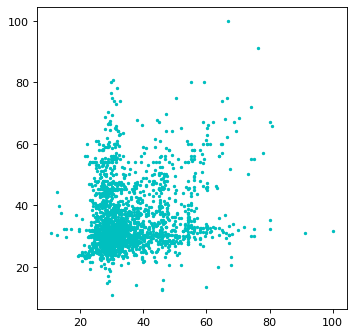

hour7


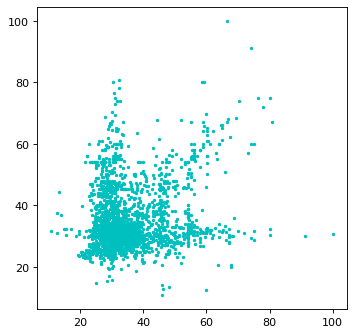

hour8


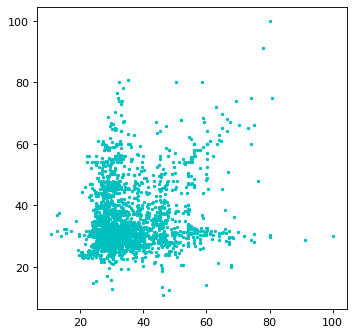

hour9


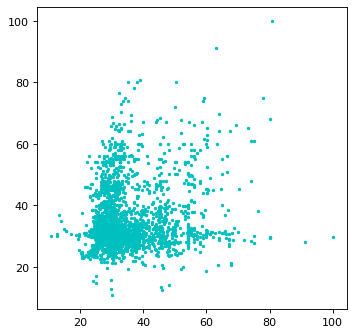

hour10


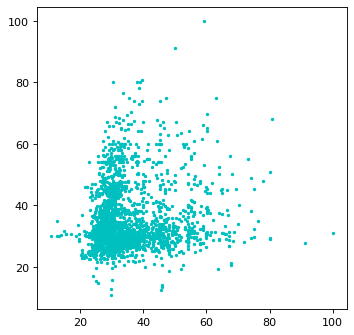

hour11


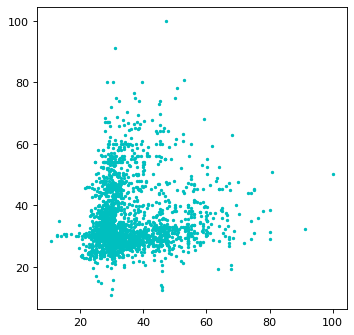

hour12


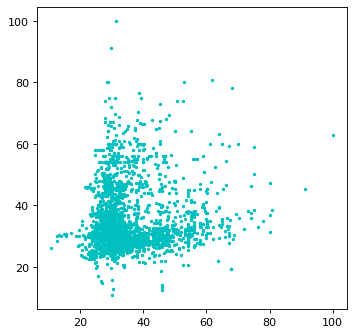

hour13


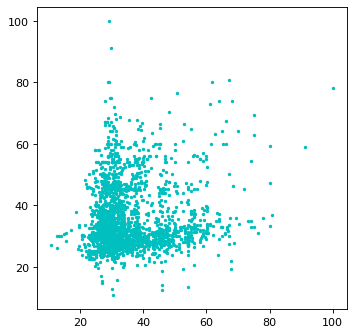

hour14


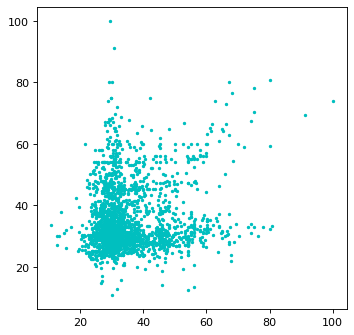

hour15


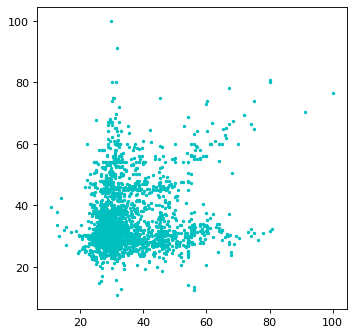

hour16


hour17


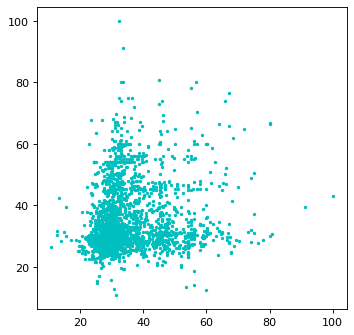

hour18


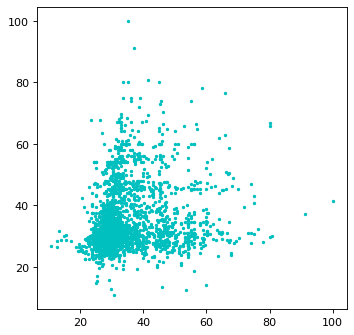

hour19


hour20


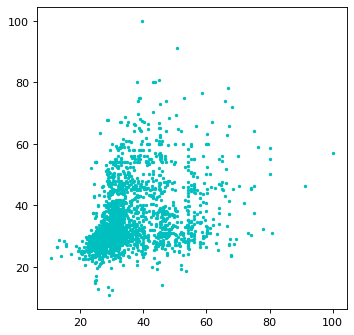

hour21


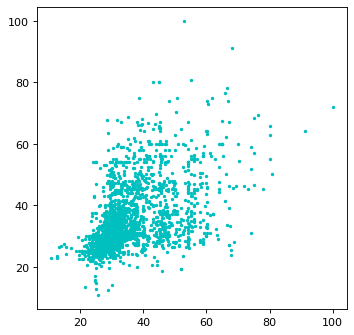

hour22


hour23


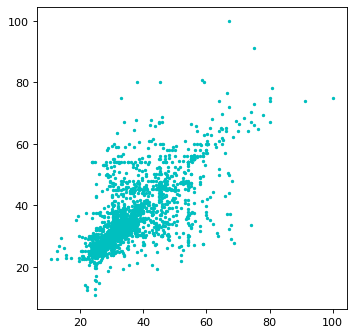

hour24


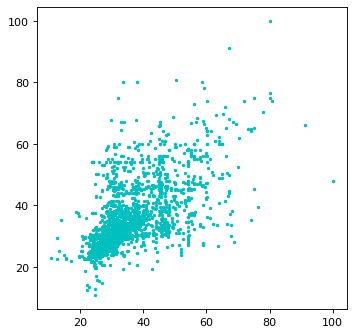

[7.729668839421853, 9.35640285685717, 10.314598783567478, 10.769548204216543, 10.951953663733601, 11.018841470268773, 11.072725935056136, 11.14985885346676, 11.236678237383915, 11.351656516608971, 11.417692452092606, 11.414222077622613, 11.366986438046345, 11.337678434642342, 11.343623545100199, 11.382236914393994, 11.385803658840494, 11.277816704279134, 10.989993800236011, 10.449829745700091, 9.570674760615626, 8.507436577249612, 7.807981858156469, 8.34868622704819]
[5.347693303830792, 7.062676066486601, 8.235114669379096, 8.899417407789855, 9.259410376763448, 9.39709935901135, 9.487609280467996, 9.593609736556635, 9.676599979042555, 9.755922322052486, 9.829686496118086, 9.839837074266644, 9.81392619443318, 9.797631077817787, 9.805404490540802, 9.821005597926382, 9.804188619587558, 9.674390074467714, 9.330214543896131, 8.734453880047893, 7.841946262006965, 6.781768019261639, 5.992568333036462, 6.446145618421728]
[59.747780367129174, 87.54227441980501, 106.39094806597168, 115.983168522

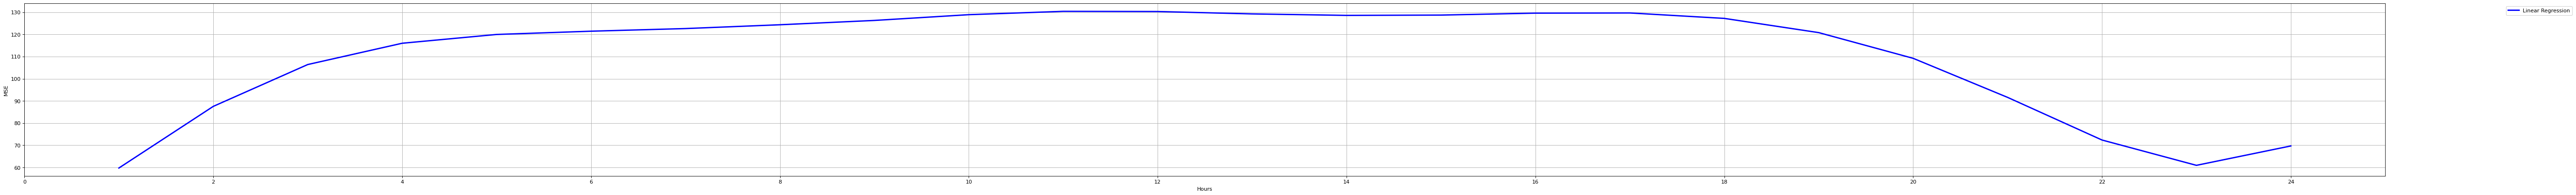

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from fastai.imports import *
from sklearn import metrics
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Hour_ahead = 24

LRhourpreRMSE = []
LRhourpreMAE = []
LRhourpreMSE = []
for a in range(Hour_ahead):
    hour_ahead = a+1
    path = "/content/drive/MyDrive/Colab Notebooks/Project/star_data_set.csv"
    Merge_all = pd.read_csv(path)
    dti = pd.to_datetime(Merge_all['DateTime'], format='%Y-%m-%d %H', exact=False)
    Merge_all.set_index(pd.Index(dti), inplace=True)
    Merge_all.drop(['DateTime'], axis=1, inplace=True)
    First = Merge_all.iloc[0:20000, :]
    N_index = First.shape
    Y_temp = First['FI']
    Y = Y_temp.iloc[hour_ahead:N_index[0]]
    Y = Y.to_numpy()
    Y = Y[0:11000]

    X_temp1 = First['FI']
    X_temp2 = First.loc[:, First.columns != 'FI']
    X_temp2_index = X_temp2.index + DateOffset(hours=-hour_ahead)
    X_temp2.set_index(X_temp2_index, inplace=True)
    X_temp1 = X_temp1.to_frame()
    X_temp = X_temp1.join(X_temp2)
    X = X_temp.iloc[0:N_index[0] - hour_ahead]
    X = X.drop(First.columns.difference(['FI']), axis=1)

    X = X.to_numpy()
    X = X[0:11000,:]
    Pred_index = X.shape
    #print("Shape = "+str(Pred_index))

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(X_train,y_train)
    predf = reg.predict(X_test)

    MSE = mean_squared_error(y_test, predf, squared=True)
    #print("Testing MSE  " + str(MSE))
    RMSE = np.sqrt(MSE)
    #print("Testing RMSE  " + str(RMSE))
    MAE = mean_absolute_error(y_test, predf)
    #print("Testing MAE  " + str(MAE))
    
    LRhourpreRMSE.append(RMSE)
    LRhourpreMAE.append(MAE)
    LRhourpreMSE.append(MSE)
    print("hour"+str(a+1))
    plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(X_test, y_test, c="c", s=4)
    #plt.plot(X_test, predf, '-', color='black');
    plt.show()
    
    #df = pd.DataFrame(X_test, columns=['x'])
    #df['y'] = y_test
    #plot = sns.jointplot(data=df, x="x", y="y")
    #plot.ax_joint.plot(X_test, predf, 'b-', linewidth = 2)



print(LRhourpreRMSE)
print(LRhourpreMAE)
print(LRhourpreMSE)

plt.figure(figsize=(80, 6), dpi=80)
plt.plot(np.arange(len(LRhourpreMSE))+1, LRhourpreMSE, color="blue", linewidth=2.5, linestyle="-", label='Linear Regression')
plt.xlabel('Hours')
plt.ylabel('MSE')
plt.grid(linestyle='-')
plt.xlim(0, Hour_ahead+1)  
plt.xticks(np.arange(0, len(LRhourpreMSE)+1, 2.0))
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()